# **Hazard risk management**
https://hazards.fema.gov/nri/data-resources

https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2

https://www.kaggle.com/datasets/davidbroberts/us-gdp-by-state-19972020

https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income

https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html#par_textimage_70769902

https://apps.bea.gov/regional/downloadzip.cfm

**Packages**

In [1]:
import numpy as np
from google.colab import drive
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##Connect to Directory

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


K's Directory

In [3]:
% cd "/content/drive/MyDrive/cs6830/FinalProject/Datasets"
% ls .

[Errno 2] No such file or directory: '/content/drive/MyDrive/cs6830/FinalProject/Datasets'
/content
drive/  sample_data/


L's Directory

In [4]:
% cd "/content/drive/MyDrive/cs6830/final/Datasets"
% ls .

/content/drive/MyDrive/cs6830/final/Datasets
2000-2009.csv                           NRIDataDictionary.csv
2010-2019.csv                           NRI_HazardInfo.csv
2020-2021.csv                           NRI_metadata_November2021.docx
GDP_1997_2021.csv                       NRI_metadata_November2021.xml
GDPByState.csv                          NRI_Table_Counties.csv
HazardMitigationAssistanceProjects.csv  NRI_Table_States.csv


# Mitigation project datasets and population

In [5]:
#HazardMitigationAssistanceProjects
RiskManagement = pd.read_csv('HazardMitigationAssistanceProjects.csv')
display(RiskManagement.head())
RiskManagement.shape

region  stateNumberCode         state  countyCode      county programArea  \
0       6               35    New Mexico        43.0    Sandoval        HMGP   
1       4               28   Mississippi       153.0       Wayne        HMGP   
2       2               36      New York        57.0  Montgomery        HMGP   
3      10               41        Oregon        35.0     Klamath        HMGP   
4       3               42  Pennsylvania        37.0    Columbia        HMGP   

  projectIdentifier                                        projectType  \
0    DR-4079-0003-R  402.1: Infrastructure Protective Measures (Roa...   
1    DR-1604-0288-R       205.8: Retrofitting Public Structures - Wind   
2    DR-4020-0051-R  202.1: Elevation of Private Structures - Riverine   
3    DR-4432-0004-F  100.1: Public Awareness and Education (Brochur...   
4    DR-4030-0055-R  200.1: Acquisition of Private Real Property (S...   

   projectTitle projectCounties  ...     dateInitiallyApproved  \
0           NaN        SANDOVAL  ...  2016-05-31T04:00:00.000Z   
1           NaN           WAYNE  ...  2009-06-23T04:00:00.000Z   
2           NaN      MONTGOMERY  ...  2013-04-25T04:00:00.000Z   
3           NaN         KLAMATH  ...  2021-03-18T04:00:00.000Z   
4           NaN        COLUMBIA  ...  2013-02-11T05:00:00.000Z   

               dateApproved                dateClosed granteeTribalIndicator  \
0  2021-05-13T04:00:00.000Z  2021-05-13T04:00:00.000Z                    0.0   
1  2013-04-08T04:00:00.000Z  2013-04-11T04:00:00.000Z                    0.0   
2  2013-04-25T04:00:00.000Z  1970-01-01T00:00:00.000Z                    0.0   
3  2021-03-18T04:00:00.000Z  1970-01-01T00:00:00.000Z                    0.0   
4  2016-08-11T04:00:00.000Z  2016-08-11T04:00:00.000Z                    0.0   

     grantee  disasterNumber  benefitCostRatio  netValueBenefits  \
0  Statewide          4079.0             6.350        14010057.0   
1  Statewide          1604.0             1.061           57469.0   
2  Statewide          4020.0             2.270          135072.0   
3  Statewide          4432.0             0.000               0.0   
4  Statewide          4030.0             0.000               0.0   

  subgranteeTribalIndicator                        id  
0                       0.0  625458d8c1418f298e585a51  
1                       0.0  625458d8c1418f298e585a4a  
2                       0.0  625458d8c1418f298e585a55  
3                       0.0  625458d8c1418f298e585a68  
4                       0.0  625458d8c1418f298e585a69  

[5 rows x 28 columns]

(30647, 28)

In [6]:
display(RiskManagement.dateInitiallyApproved.min())
display(RiskManagement.dateInitiallyApproved.max())
display(RiskManagement.describe())
display(RiskManagement.dateInitiallyApproved.describe())

'0016-06-10T04:56:02.000Z'

'7019-11-01T04:00:00.000Z'

region  stateNumberCode    countyCode  projectTitle  \
count  30647.000000     30647.000000  28574.000000           0.0   
mean       5.188958        27.923190     73.005914           NaN   
std        2.420374        17.291014     85.193734           NaN   
min        1.000000         1.000000      0.000000           NaN   
25%        4.000000        12.000000     15.000000           NaN   
50%        5.000000        27.000000     53.000000           NaN   
75%        7.000000        40.000000    103.000000           NaN   
max       10.000000        78.000000    840.000000           NaN   

       numberOfProperties  numberOfFinalProperties  costSharePercentage  \
count        30647.000000             30647.000000         30627.000000   
mean             5.480471                 4.660717             0.748911   
std             85.840956                81.641477             0.118408   
min              0.000000                 0.000000            -0.750000   
25%              0.000000                 0.000000             0.750000   
50%              0.000000                 0.000000             0.750000   
75%              1.000000                 1.000000             0.750000   
max           8043.000000              8043.000000             3.020000   

       projectAmount  federalShareObligated     programFy  \
count   3.062700e+04           3.064700e+04  30647.000000   
mean    8.793066e+05           5.378289e+05   2007.133031   
std     8.935945e+06           5.650196e+06      7.780229   
min    -1.624776e+06           1.000000e+00   1989.000000   
25%     3.784502e+04           2.685462e+04   2001.000000   
50%     1.186290e+05           8.294194e+04   2008.000000   
75%     4.415988e+05           3.000000e+05   2013.000000   
max     7.290000e+08           6.783164e+08   2021.000000   

       granteeTribalIndicator  disasterNumber  benefitCostRatio  \
count            23711.000000    23884.000000      3.064700e+04   
mean                 0.012863     2490.973581      1.659784e+02   
std                  0.112687     1596.599666      2.002720e+04   
min                  0.000000      820.000000      0.000000e+00   
25%                  0.000000     1346.000000      0.000000e+00   
50%                  0.000000     1763.000000      9.700000e-01   
75%                  0.000000     4117.000000      1.679000e+00   
max                  1.000000     9428.000000      2.479070e+06   

       netValueBenefits  subgranteeTribalIndicator  
count      2.571900e+04               23711.000000  
mean       1.118345e+07                   0.015098  
std        8.206019e+08                   0.121947  
min        0.000000e+00                   0.000000  
25%        0.000000e+00                   0.000000  
50%        1.086920e+05                   0.000000  
75%        1.000000e+06                   0.000000  
max        8.984396e+10                   1.000000

count                        30647
unique                        5123
top       1970-01-01T00:00:00.000Z
freq                          6942
Name: dateInitiallyApproved, dtype: object

## select fiscal years from 2001 to 2022

In [7]:
display(RiskManagement.programFy.unique())

array([2012, 2005, 2011, 2019, 2007, 2008, 2000, 2013, 2003, 2014, 2010,
       2001, 1999, 2018, 2015, 2017, 2004, 2009, 2006, 2002, 2016, 2020,
       1998, 1994, 1996, 1997, 1991, 1990, 1995, 1989, 1993, 1992, 2021])

In [8]:
# only keep data that from 2001 to 2022 to match population (2000-2021)
RevisedRiskMng = RiskManagement[RiskManagement.programFy.between(2001, 2022)]
display(Counter(RevisedRiskMng['programFy']))
display(Counter(RevisedRiskMng.programArea))
# select only hazard mitigation projects
RevisedRiskMng = RevisedRiskMng[RevisedRiskMng.programArea == "HMGP"]

Counter({2001: 1060,
         2002: 817,
         2003: 979,
         2004: 1185,
         2005: 1865,
         2006: 595,
         2007: 1192,
         2008: 1679,
         2009: 1285,
         2010: 1245,
         2011: 2302,
         2012: 661,
         2013: 1367,
         2014: 969,
         2015: 889,
         2016: 1110,
         2017: 2024,
         2018: 1075,
         2019: 1147,
         2020: 291,
         2021: 21})

Counter({'FMA': 1796,
         'HMGP': 17587,
         'LPDM': 253,
         'PDM': 3783,
         'RFC': 98,
         'SRL': 241})

## Load population datasets

In [9]:
pop2000 = pd.read_csv("2000-2009.csv", encoding = "ISO-8859-1")
list(pop2000.columns)
pop2000 = pop2000[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2000', 'POPESTIMATE2001', 'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004', 'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007', 'POPESTIMATE2008', 'POPESTIMATE2009']]
display(pop2000.head())
display(pop2000.shape)
display(len(pop2000.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2000  POPESTIMATE2001  \
0      1       0  Alabama         Alabama          4451849          4464034   
1      1       1  Alabama  Autauga County            43872            44434   
2      1       3  Alabama  Baldwin County           141358           144988   
3      1       5  Alabama  Barbour County            29035            29223   
4      1       7  Alabama     Bibb County            19936            20942   

   POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0          4472420          4490591          4512190          4545049   
1            45157            45762            46933            47870   
2           148141           151707           156573           162564   
3            29289            29480            29458            29452   
4            20983            21037            21208            21375   

   POPESTIMATE2006  POPESTIMATE2007  POPESTIMATE2008  POPESTIMATE2009  
0          4597688          4637904          4677464          4708708  
1            49105            49834            50354            50756  
2           168516           172815           176212           179878  
3            29556            29736            29836            29737  
4            21285            21485            21589            21587

(3194, 14)

51

In [10]:
pop2010 = pd.read_csv("2010-2019.csv", encoding = "ISO-8859-1")
pop2010 = pop2010[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']]
display(pop2010.head())
display(pop2010.shape)
display(len(pop2010.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2010  POPESTIMATE2011  \
0      1       0  Alabama         Alabama          4785437          4799069   
1      1       1  Alabama  Autauga County            54773            55227   
2      1       3  Alabama  Baldwin County           183112           186558   
3      1       5  Alabama  Barbour County            27327            27341   
4      1       7  Alabama     Bibb County            22870            22745   

   POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
0          4815588          4830081          4841799          4852347   
1            54954            54727            54893            54864   
2           190145           194885           199183           202939   
3            27169            26937            26755            26283   
4            22667            22521            22553            22566   

   POPESTIMATE2016  POPESTIMATE2017  POPESTIMATE2018  POPESTIMATE2019  
0          4863525          4874486          4887681          4903185  
1            55243            55390            55533            55869  
2           207601           212521           217855           223234  
3            25806            25157            24872            24686  
4            22586            22550            22367            22394

(3193, 14)

51

In [11]:
pop2020 = pd.read_csv("2020-2021.csv", encoding = "ISO-8859-1")
pop2020 = pop2020[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2020', 'POPESTIMATE2021']]
display(pop2020.head())
display(pop2020.shape)
display(len(pop2020.STATE.unique()))

STATE  COUNTY   STNAME         CTYNAME  POPESTIMATE2020  POPESTIMATE2021
0      1       0  Alabama         Alabama          5024803          5039877
1      1       1  Alabama  Autauga County            58877            59095
2      1       3  Alabama  Baldwin County           233140           239294
3      1       5  Alabama  Barbour County            25180            24964
4      1       7  Alabama     Bibb County            22223            22477

(3194, 6)

51

In [12]:
stPop2000 = pop2000[pop2000.COUNTY == 0]
stPop2010 = pop2010[pop2010.COUNTY == 0]
stPop2020 = pop2020[pop2020.COUNTY == 0]

## Merge population with mitigation projects

In [13]:
# merge 2000-2022 to one df
stPop = stPop2000.merge(stPop2010, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
stPop = stPop.merge(stPop2020, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
stPop.drop(stPop.iloc[:, 2:4], inplace = True, axis = 1)
stPop.rename(columns = {'STATE':'stateNumberCode','COUNTY':'countyCode'}, inplace = True)
display(stPop.columns)
display(stPop.shape)
display(stPop)


Index(['stateNumberCode', 'countyCode', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'POPESTIMATE2021'],
      dtype='object')

(51, 24)

stateNumberCode  countyCode  POPESTIMATE2000  POPESTIMATE2001  \
0                 1           0          4451849          4464034   
1                 2           0           627499           633316   
2                 4           0          5166697          5304417   
3                 5           0          2678288          2691068   
4                 6           0         33994571         34485623   
5                 8           0          4328070          4433068   
6                 9           0          3411726          3428433   
7                10           0           786411           794620   
8                11           0           571744           578042   
9                12           0         16047118         16353869   
10               13           0          8230161          8419594   
11               15           0          1211566          1218305   
12               16           0          1299551          1321170   
13               17           0         12437645         12507833   
14               18           0          6091649          6124967   
15               19           0          2928184          2929424   
16               20           0          2692810          2701456   
17               21           0          4048903          4069191   
18               22           0          4468979          4460816   
19               23           0          1277211          1284791   
20               24           0          5310579          5375033   
21               25           0          6363015          6411730   
22               26           0          9955308         10006093   
23               27           0          4933958          4982813   
24               28           0          2848310          2853313   
25               29           0          5606065          5643986   
26               30           0           903293           905873   
27               31           0          1713345          1717948   
28               32           0          2018211          2094509   
29               33           0          1240446          1256879   
30               34           0          8430921          8489469   
31               35           0          1820813          1828809   
32               36           0         18998044         19088978   
33               37           0          8079383          8203451   
34               38           0           641200           636267   
35               39           0         11363844         11396874   
36               40           0          3453943          3464729   
37               41           0          3430891          3470382   
38               42           0         12285504         12299533   
39               44           0          1050736          1058051   
40               45           0          4023570          4062701   
41               46           0           755694           758983   
42               47           0          5703243          5755443   
43               48           0         20945963         21332847   
44               49           0          2244314          2291250   
45               50           0           609903           612153   
46               51           0          7104533          7191304   
47               53           0          5911122          5987785   
48               54           0          1806962          1798582   
49               55           0          5374254          5408769   
50               56           0           493958           492982   

    POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0           4472420          4490591          4512190          4545049   
1            642691           650884           661569           669488   
2           5452108          5591206          5759425          5974834   
3           2704732          2722291          2746161          2776221   
4          34876194         35251107         

In [14]:
# merge county pop from 2000-2022 into one df
pop = pop2000.merge(pop2010, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
pop = pop.merge(pop2020, on=['STATE', 'COUNTY', 'STNAME', 'CTYNAME'])
# pop.rename(columns = {'STNAME':'state', 'CTYNAME':'county'}, inplace = True)
pop.drop(pop.iloc[:, 2:4], inplace = True, axis = 1)
pop.rename(columns = {'STATE':'stateNumberCode', 'COUNTY':'countyCode'}, inplace = True)
display(pop.columns)
pop.shape

Index(['stateNumberCode', 'countyCode', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'POPESTIMATE2021'],
      dtype='object')

(3188, 24)

In [15]:
RiskMngPop = pop.merge(RevisedRiskMng, on=['stateNumberCode', 'countyCode'])
display(RiskMngPop.shape)
display(RiskMngPop.head())
RiskMngPop.countyCode.unique()

(17101, 50)

stateNumberCode  countyCode  POPESTIMATE2000  POPESTIMATE2001  \
0                1           0          4451849          4464034   
1                1           0          4451849          4464034   
2                1           0          4451849          4464034   
3                1           0          4451849          4464034   
4                1           0          4451849          4464034   

   POPESTIMATE2002  POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  \
0          4472420          4490591          4512190          4545049   
1          4472420          4490591          4512190          4545049   
2          4472420          4490591          4512190          4545049   
3          4472420          4490591          4512190          4545049   
4          4472420          4490591          4512190          4545049   

   POPESTIMATE2006  POPESTIMATE2007  ...     dateInitiallyApproved  \
0          4597688          4637904  ...  2020-09-10T04:00:00.000Z   
1          4597688          4637904  ...  2020-09-17T04:00:00.000Z   
2          4597688          4637904  ...  2020-08-21T04:00:00.000Z   
3          4597688          4637904  ...  2020-08-20T04:00:00.000Z   
4          4597688          4637904  ...  2020-09-10T04:00:00.000Z   

               dateApproved                dateClosed  granteeTribalIndicator  \
0  2020-09-10T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
1  2020-09-17T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
2  2020-08-21T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
3  2020-08-20T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   
4  2021-07-14T04:00:00.000Z  1970-01-01T00:00:00.000Z                     0.0   

     grantee  disasterNumber  benefitCostRatio  netValueBenefits  \
0  Statewide          4426.0               0.0               0.0   
1  Statewide          4546.0               0.0               0.0   
2  Statewide          4554.0               0.0               0.0   
3  Statewide          4419.0               0.0               0.0   
4  Statewide          4406.0               0.0               0.0   

   subgranteeTribalIndicator                        id  
0                        0.0  625458d9c1418f298e586acf  
1                        0.0  625458d9c1418f298e586b53  
2                        0.0  625458d9c1418f298e586b54  
3                        0.0  625458d9c1418f298e586c0d  
4                        0.0  625458d9c1418f298e586ba3  

[5 rows x 50 columns]

array([  0,   1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,
        25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,
        77,  79,  81,  83,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133,  16,  20,  50,  68,  90, 110, 122, 150, 170, 180, 185,
       188, 220, 230, 290,  12,  85, 135, 137, 139, 141, 143, 145, 147,
       149,  86, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 187, 189, 191, 193, 195, 197, 199,
       201, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227,
       229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,
       255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279,
       281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305,
       307, 309, 311, 313, 315, 317, 319, 321, 203, 510, 186,   

In [16]:
# add county population to risk
poplist = []
for index, row in RiskMngPop.iterrows():
  year = row['programFy']
  col = 'POPESTIMATE' + str(year - 1)
  poplist.append(row[col])

RiskMngPop = RiskMngPop.assign(countyPop = poplist)
display(RiskMngPop.shape)

(17101, 51)

In [17]:
# Remove the pop columns for each year
RiskMngPop.drop(RiskMngPop.iloc[:, 2:24], inplace = True, axis = 1)
RiskMngPop.head()

stateNumberCode  countyCode  region    state     county programArea  \
0                1           0       4  Alabama  Statewide        HMGP   
1                1           0       4  Alabama  Statewide        HMGP   
2                1           0       4  Alabama  Statewide        HMGP   
3                1           0       4  Alabama  Statewide        HMGP   
4                1           0       4  Alabama  Statewide        HMGP   

  projectIdentifier                         projectType  projectTitle  \
0    DR-4426-0001-M  700.1: Management Costs - Salaries           NaN   
1    DR-4546-0001-M  700.1: Management Costs - Salaries           NaN   
2    DR-4554-0001-M  700.1: Management Costs - Salaries           NaN   
3    DR-4419-0001-M  700.1: Management Costs - Salaries           NaN   
4    DR-4406-0003-M  700.1: Management Costs - Salaries           NaN   

  projectCounties  ...              dateApproved                dateClosed  \
0       STATEWIDE  ...  2020-09-10T04:00:00.000Z  1970-01-01T00:00:00.000Z   
1       STATEWIDE  ...  2020-09-17T04:00:00.000Z  1970-01-01T00:00:00.000Z   
2       STATEWIDE  ...  2020-08-21T04:00:00.000Z  1970-01-01T00:00:00.000Z   
3       STATEWIDE  ...  2020-08-20T04:00:00.000Z  1970-01-01T00:00:00.000Z   
4       STATEWIDE  ...  2021-07-14T04:00:00.000Z  1970-01-01T00:00:00.000Z   

  granteeTribalIndicator    grantee  disasterNumber  benefitCostRatio  \
0                    0.0  Statewide          4426.0               0.0   
1                    0.0  Statewide          4546.0               0.0   
2                    0.0  Statewide          4554.0               0.0   
3                    0.0  Statewide          4419.0               0.0   
4                    0.0  Statewide          4406.0               0.0   

   netValueBenefits  subgranteeTribalIndicator                        id  \
0               0.0                        0.0  625458d9c1418f298e586acf   
1               0.0                        0.0  625458d9c1418f298e586b53   
2               0.0                        0.0  625458d9c1418f298e586b54   
3               0.0                        0.0  625458d9c1418f298e586c0d   
4               0.0                        0.0  625458d9c1418f298e586ba3   

  countyPop  
0   4887681  
1   4903185  
2   4903185  
3   4887681  
4   4887681  

[5 rows x 29 columns]

In [18]:
RevisedRiskMngPop = stPop.merge(RiskMngPop, on=['stateNumberCode'])
RevisedRiskMngPop.head()
RevisedRiskMngPop.drop(columns='countyCode_x')

stateNumberCode  POPESTIMATE2000  POPESTIMATE2001  POPESTIMATE2002  \
0                    1          4451849          4464034          4472420   
1                    1          4451849          4464034          4472420   
2                    1          4451849          4464034          4472420   
3                    1          4451849          4464034          4472420   
4                    1          4451849          4464034          4472420   
...                ...              ...              ...              ...   
17096               56           493958           492982           497069   
17097               56           493958           492982           497069   
17098               56           493958           492982           497069   
17099               56           493958           492982           497069   
17100               56           493958           492982           497069   

       POPESTIMATE2003  POPESTIMATE2004  POPESTIMATE2005  POPESTIMATE2006  \
0              4490591          4512190          4545049          4597688   
1              4490591          4512190          4545049          4597688   
2              4490591          4512190          4545049          4597688   
3              4490591          4512190          4545049          4597688   
4              4490591          4512190          4545049          4597688   
...                ...              ...              ...              ...   
17096           499189           502988           506242           512841   
17097           499189           502988           506242           512841   
17098           499189           502988           506242           512841   
17099           499189           502988           506242           512841   
17100           499189           502988           506242           512841   

       POPESTIMATE2007  POPESTIMATE2008  ...              dateApproved  \
0              4637904          4677464  ...  2020-09-10T04:00:00.000Z   
1              4637904          4677464  ...  2020-09-17T04:00:00.000Z   
2              4637904          4677464  ...  2020-08-21T04:00:00.000Z   
3              4637904          4677464  ...  2020-08-20T04:00:00.000Z   
4              4637904          4677464  ...  2021-07-14T04:00:00.000Z   
...                ...              ...  ...                       ...   
17096           523414           532981  ...  2015-01-22T05:00:00.000Z   
17097           523414           532981  ...  2020-05-06T04:00:00.000Z   
17098           523414           532981  ...  2021-10-21T04:00:00.000Z   
17099           523414           532981  ...  2003-09-25T04:00:00.000Z   
17100           523414           532981  ...  2021-08-25T04:00:00.000Z   

                     dateClosed  granteeTribalIndicator    grantee  \
0      1970-01-01T00:00:00.000Z                     0.0  Statewide   
1      1970-01-01T00:00:00.000Z                     0.0  Statewide   
2      1970-01-01T00:00:00.000Z                     0.0  Statewide   
3      1970-01-01T00:00:00.000Z                     0.0  Statewide   
4      1970-01-01T00:00:00.000Z                     0.0  Statewide   
...                         ...                     ...        ...   
17096  2015-01-23T05:00:00.000Z                     0.0  Statewide   
17097  2020-05-06T04:00:00.000Z                     0.0  Statewide   
17098  2021-10-22T04:00:00.000Z                     0.0  Statewide   
17099  2005-06-06T04:00:00.000Z                     0.0  Statewide   
17100  2021-08-02T04:00:00.000Z                     0.0  Statewide   

       disasterNumber  benefitCostRatio  netValueBenefits  \
0              4426.0             0.000               0.0   
1              4546.0             0.000               0.0   
2              4554.0             0.000               0.0   
3              4419.0             0.000               0.0   
4              4406.0             0.000               0.0   
...               ...               ...               ...   


In [19]:
# add county population to risk
stPoplist = []
for index, row in RevisedRiskMngPop.iterrows():
  year = row['programFy']
  col = 'POPESTIMATE' + str(year - 1)
  stPoplist.append(row[col])

RevisedRiskMngPop = RevisedRiskMngPop.assign(statePop = stPoplist)
display(RevisedRiskMngPop.shape)
RevisedRiskMngPop.columns


RevisedRiskMngPop.drop(RevisedRiskMngPop.iloc[:, 1:24], inplace = True, axis = 1)
RevisedRiskMngPop.columns
RevisedRiskMngPop.rename(columns = {'countyCode_y':'countyCode'}, inplace = True)

(17101, 53)

In [20]:
RevisedRiskMngPop.columns

Index(['stateNumberCode', 'countyCode', 'region', 'state', 'county',
       'programArea', 'projectIdentifier', 'projectType', 'projectTitle',
       'projectCounties', 'numberOfProperties', 'numberOfFinalProperties',
       'status', 'subgrantee', 'costSharePercentage', 'projectAmount',
       'federalShareObligated', 'programFy', 'dateInitiallyApproved',
       'dateApproved', 'dateClosed', 'granteeTribalIndicator', 'grantee',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'subgranteeTribalIndicator', 'id', 'countyPop', 'statePop'],
      dtype='object')

## Add counts to risk project

In [21]:
# ADD COUNT TO PROJECT BASED ON COUNTY
project_county_count = RevisedRiskMngPop.groupby(["stateNumberCode", "countyCode", "programFy"]).size().reset_index(name="count")
project_county_count
project_info = project_county_count.merge(RevisedRiskMngPop, on=['stateNumberCode', 'countyCode', 'programFy'])
project_state_count = RevisedRiskMngPop.groupby(["stateNumberCode", "programFy"]).size().reset_index(name="stateCount")
project_info = project_state_count.merge(project_info, on=["stateNumberCode", "programFy"])
project_info.head()

stateNumberCode  programFy  stateCount  countyCode  count  region    state  \
0                1       2001           3           1      1       4  Alabama   
1                1       2001           3          47      1       4  Alabama   
2                1       2001           3          89      1       4  Alabama   
3                1       2002           3           0      2       4  Alabama   
4                1       2002           3           0      2       4  Alabama   

      county programArea projectIdentifier  ...                dateClosed  \
0    Autauga        HMGP    DR-1352-0005-R  ...  2007-08-07T04:00:00.000Z   
1     Dallas        HMGP    DR-1352-0004-R  ...  2006-10-20T04:00:00.000Z   
2    Madison        HMGP    DR-1362-0003-R  ...  2006-05-23T04:00:00.000Z   
3  Statewide        HMGP    DR-1399-0001-R  ...  2008-06-06T04:00:00.000Z   
4  Statewide        HMGP    DR-1399-0002-F  ...  2008-06-20T04:00:00.000Z   

   granteeTribalIndicator    grantee  disasterNumber  benefitCostRatio  \
0                     0.0  Statewide          1352.0             0.000   
1                     0.0  Statewide          1352.0             1.483   
2                     0.0  Statewide          1362.0             0.000   
3                     0.0  Statewide          1399.0             0.000   
4                     0.0  Statewide          1399.0             0.000   

  netValueBenefits subgranteeTribalIndicator                        id  \
0              0.0                       0.0  625458dac1418f298e5870b6   
1         264947.0                       0.0  625458dec1418f298e58b2c8   
2              0.0                       0.0  625458dfc1418f298e58c6ad   
3              0.0                       0.0  625458d9c1418f298e586ce5   
4              0.0                       0.0  625458dac1418f298e586e34   

   countyPop  statePop  
0      43872   4451849  
1      46181   4451849  
2     277868   4451849  
3    4464034   4464034  
4    4464034   4464034  

[5 rows x 32 columns]

In [22]:
project_info.countyCode.unique()

array([  1,  47,  89,   0,  37,   3,  15,  61,  69,  71,  73,  81,  97,
       103, 111, 127, 131, 133,   7,   9,  13,  17,  21,  23,  25,  27,
        31,  33,  35,  39,  41,  45,  51,  53,  57,  59,  67,  75,  77,
        83,  91,  93,  95,  99, 101, 107, 113, 115, 117, 121, 123, 125,
       129,   5,  19,  43,  55,  79, 109,  49,  87, 105,  11,  29,  63,
        65, 119,  50,  20,  90, 122, 170, 180, 185, 150, 188,  16, 110,
       290,  68, 220, 230,  12, 137, 143, 145, 135, 147,  85, 141, 149,
       139,  86, 277, 311, 317, 153, 169, 171, 175, 177, 179, 187, 189,
       205, 207, 235, 255, 259, 261, 269, 291, 293, 305, 321, 191, 233,
       267, 289, 151, 155, 157, 159, 161, 167, 173, 183, 193, 195, 197,
       201, 209, 211, 213, 215, 217, 219, 221, 223, 225, 229, 237, 239,
       241, 243, 245, 247, 249, 251, 253, 257, 271, 273, 275, 279, 281,
       285, 287, 295, 299, 301, 303, 307, 309, 313, 315, 319, 163, 165,
       181, 199, 227, 231, 263, 265, 283, 297, 203, 510, 186,   

## projects at county level for each year and avg over 22 years

In [23]:
agg_func = {'count':'sum', 'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum'}
county_project = project_info.groupby(['stateNumberCode','countyCode', 'state', 'county', 'programFy', 'countyPop']).agg(agg_func).reset_index()
county_project['proposed_amount_per_person'] = county_project['projectAmount'] / county_project['countyPop']
county_project['federal_share_per_person'] = county_project['federalShareObligated'] / county_project['countyPop']
county_project['federal_share_percentage'] = county_project['federalShareObligated'] / county_project['projectAmount']
county_project.county = county_project.county.str.strip(" (city)")
county_project

stateNumberCode  countyCode    state     county  programFy  countyPop  \
0                   1           0  Alabama  Statewide       2002    4464034   
1                   1           0  Alabama  Statewide       2003    4472420   
2                   1           0  Alabama  Statewide       2004    4490591   
3                   1           0  Alabama  Statewide       2005    4512190   
4                   1           0  Alabama  Statewide       2008    4637904   
...               ...         ...      ...        ...        ...        ...   
7591               56          33  Wyoming   Sheridan       2011      29148   
7592               56          33  Wyoming   Sheridan       2015      29852   
7593               56          35  Wyoming   Sublette       2018       9745   
7594               56          39  Wyoming      Teton       2001      18367   
7595               56          45  Wyoming     Weston       2017       7220   

      count  costSharePercentage  projectAmount  federalShareObligated  \
0         4             0.540000      610503.00              422891.00   
1        16             0.657500     1189355.00              851719.00   
2         4             0.750000     3164577.00             2373433.00   
3         4             0.845000     4257806.00             3371824.00   
4         9             0.916667      221048.00              199798.02   
...     ...                  ...            ...                    ...   
7591      4             0.750000      227143.00              170358.00   
7592      1             0.750000      304817.00              228612.81   
7593      1             0.750000      311751.67              233813.75   
7594      1             0.750000      120791.00               90593.00   
7595      1             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0             2798.0             0.000               0.0   
1             5788.0             0.000               0.0   
2             3098.0             0.000               0.0   
3             3210.0             0.000               0.0   
4             5383.0             0.000               0.0   
...              ...               ...               ...   
7591          8014.0             2.159          535503.0   
7592          4227.0             2.938         1190747.0   
7593          5241.0             1.040          660704.0   
7594          1351.0             1.119          139210.0   
7595          4306.0             6.222         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.136760                  0.094733   
1                       0.265931                  0.190438   
2                       0.704713                  0.528535   
3                       0.943623                  0.747270   
4                       0.047661                  0.043079   
...                          ...                       ...   
7591                    7.792747                  5.844586   
7592                   10.210941                  7.658207   
7593                   31.990936                 23.993202   
7594                    6.576523                  4.932379   
7595                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.692693  
1                     0.716118  
2                     0.750000  
3                     0.791916  
4                     0.903867  
...                        ...  
7591                  0.750003  
7592                  0.750000  
7593                  0.750000  
7594                  0.749998  
7595                  0.750000  

[7596 rows x 16 columns]

In [24]:
agg_func = {'countyPop': 'mean', 'count': 'sum', 'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum', 'proposed_amount_per_person': 'mean', 'federal_share_per_person': 'mean', 'federal_share_percentage':'mean'}
county_project_avg = county_project.groupby(['stateNumberCode', 'countyCode', 'state', 'county']).agg(agg_func).reset_index()
county_project_avg

stateNumberCode  countyCode    state     county     countyPop  count  \
0                   1           0  Alabama  Statewide  4.706828e+06     99   
1                   1           1  Alabama    Autauga  4.914500e+04     36   
2                   1           3  Alabama    Baldwin  1.793134e+05    673   
3                   1           5  Alabama    Barbour  2.959700e+04      2   
4                   1           7  Alabama       Bibb  2.170500e+04     46   
...               ...         ...      ...        ...           ...    ...   
2532               56          27  Wyoming   Niobrara  2.488000e+03      1   
2533               56          33  Wyoming   Sheridan  2.950000e+04      5   
2534               56          35  Wyoming   Sublette  9.745000e+03      1   
2535               56          39  Wyoming      Teton  1.836700e+04      1   
2536               56          45  Wyoming     Weston  7.220000e+03      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.886964    18167898.17            15219667.32   
1                0.699074     1718574.00             1224887.00   
2                0.741669    28518186.00            24040371.25   
3                0.830000       21338.00               18845.00   
4                0.735000     2931436.47             2146000.13   
...                   ...            ...                    ...   
2532             0.750000      454991.11              341243.34   
2533             0.750000      531960.00              398970.81   
2534             0.750000      311751.67              233813.75   
2535             0.750000      120791.00               90593.00   
2536             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            94212.0          0.000000               0.0   
1            29971.0          2.788352        19096405.0   
2           116299.0          4.959370       293109375.0   
3             3394.0          1.089000          165806.0   
4            18078.0          4.365889        14733224.0   
...              ...               ...               ...   
2532          4227.0          1.000000          507840.0   
2533         12241.0          2.548500         1726250.0   
2534          5241.0          1.040000          660704.0   
2535          1351.0          1.119000          139210.0   
2536          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.279652                  0.233568   
1                       3.886101                  2.769485   
2                      19.429245                 16.506251   
3                       0.361297                  0.319227   
4                      45.505311                 33.360198   
...                          ...                       ...   
2532                  182.874240                137.155683   
2533                    9.001844                  6.751397   
2534                   31.990936                 23.993202   
2535                    6.576523                  4.932379   
2536                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.878059  
1                     0.700984  
2                     0.748560  
3                     0.830672  
4                     0.722741  
...                        ...  
2532                  0.750000  
2533                  0.750002  
2534                  0.750000  
2535                  0.749998  
2536                  0.750000  

[2537 rows x 15 columns]

## projects at state level for each year and avg over 22 years

In [25]:
agg_func = {'costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'mean'}
state_project = project_info.groupby(['stateNumberCode', 'stateCount', 'state', 'programFy', 'statePop']).agg(agg_func).reset_index()

In [26]:
state_project['proposed_amount_per_person'] = state_project['projectAmount'] / state_project['statePop']
state_project['federal_share_per_person'] = state_project['federalShareObligated'] / state_project['statePop']
state_project['federal_share_percentage'] = state_project['federalShareObligated'] / state_project['projectAmount']
state_project

stateNumberCode  stateCount    state  programFy  statePop  \
0                  1           3  Alabama       2001   4451849   
1                  1           3  Alabama       2002   4464034   
2                  1           4  Alabama       2020   4903185   
3                  1           6  Alabama       2007   4597688   
4                  1          14  Alabama       2012   4799069   
..               ...         ...      ...        ...       ...   
662               56           4  Wyoming       2015    582531   
663               56           4  Wyoming       2018    578931   
664               56           6  Wyoming       2011    564487   
665               56           6  Wyoming       2017    584215   
666               56           6  Wyoming       2020    578759   

     costSharePercentage  projectAmount  federalShareObligated  \
0               0.736667      379244.00              281315.00   
1               0.603333      661781.00              460075.00   
2               1.000000      689514.00              682514.00   
3               0.748333     2010414.00             1503000.00   
4               0.729286     1660138.00             1106418.00   
..                   ...            ...                    ...   
662             0.812500      836048.11              634097.65   
663             0.812500      916598.22              697839.94   
664             0.750000     1492391.00              816983.00   
665             0.833333     1187364.31              912781.88   
666             0.786667     1358666.89             1022563.61   

     disasterNumber  benefitCostRatio  netValueBenefits  \
0            4066.0          0.494333      8.831567e+04   
1            4197.0          0.000000      0.000000e+00   
2           18218.0          0.000000      0.000000e+00   
3           10122.0         60.212667      3.720314e+06   
4           57118.0          3.291000      9.455278e+05   
..              ...               ...               ...   
662         16908.0          0.984500      4.246468e+05   
663         20964.0          2.476250      9.097618e+05   
664         24042.0          0.938500      3.556805e+05   
665         25920.0          3.345333      2.000436e+06   
666         32082.0          0.000000      0.000000e+00   

     proposed_amount_per_person  federal_share_per_person  \
0                      0.085188                  0.063191   
1                      0.148247                  0.103063   
2                      0.140626                  0.139198   
3                      0.437266                  0.326903   
4                      0.345929                  0.230548   
..                          ...                       ...   
662                    1.435199                  1.088522   
663                    1.583260                  1.205394   
664                    2.643800                  1.447302   
665                    2.032410                  1.562407   
666                    2.347552                  1.766821   

     federal_share_percentage  
0                    0.741778  
1                    0.695207  
2                    0.989848  
3                    0.747607  
4                    0.666461  
..                        ...  
662                  0.758446  
663                  0.761337  
664                  0.547432  
665                  0.768746  
666                  0.752623  

[667 rows x 14 columns]

In [27]:
agg_func = {'statePop': 'mean', 'stateCount': 'sum','costSharePercentage': 'mean', 'projectAmount':'sum', 'federalShareObligated':'sum','disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum', 'proposed_amount_per_person': 'mean', 'federal_share_per_person': 'mean', 'federal_share_percentage':'mean'}
state_project_avg = state_project.groupby(['stateNumberCode', 'state']).agg(agg_func).reset_index()
state_project_avg

stateNumberCode                 state      statePop  stateCount  \
0                 1               Alabama  4.684071e+06        1419   
1                 2                Alaska  6.979447e+05         134   
2                 4               Arizona  6.088689e+06          66   
3                 5              Arkansas  2.873027e+06         278   
4                 6            California  3.759234e+07         668   
5                 8              Colorado  5.149946e+06         120   
6                 9           Connecticut  3.558241e+06         141   
7                10              Delaware  8.879635e+05          38   
8                11  District of Columbia  6.262507e+05          16   
9                12               Florida  1.873995e+07        1656   
10               13               Georgia  9.804005e+06         505   
11               15                Hawaii  1.319793e+06          65   
12               16                 Idaho  1.586617e+06          51   
13               17              Illinois  1.272063e+07         180   
14               18               Indiana  6.349434e+06         112   
15               19                  Iowa  3.047638e+06         618   
16               20                Kansas  2.815756e+06         364   
17               21              Kentucky  4.282227e+06         516   
18               22             Louisiana  4.543327e+06         806   
19               23                 Maine  1.314222e+06          84   
20               24              Maryland  5.754462e+06         174   
21               25         Massachusetts  6.602421e+06         201   
22               26              Michigan  9.977706e+06         197   
23               27             Minnesota  5.295060e+06         260   
24               28           Mississippi  2.943111e+06         687   
25               29              Missouri  5.937073e+06         367   
26               30               Montana  1.001562e+06         109   
27               31              Nebraska  1.812901e+06         325   
28               32                Nevada  2.673112e+06          36   
29               33         New Hampshire  1.322104e+06         160   
30               34            New Jersey  8.748983e+06         608   
31               35            New Mexico  2.049346e+06          78   
32               36              New York  1.940764e+07         421   
33               37        North Carolina  9.611352e+06         339   
34               38          North Dakota  6.742067e+05         248   
35               39                  Ohio  1.152680e+07         237   
36               40              Oklahoma  3.746248e+06        1047   
37               41                Oregon  3.852325e+06         193   
38               42          Pennsylvania  1.259117e+07         274   
39               44          Rhode Island  1.055584e+06          46   
40               45        South Carolina  4.657604e+06         259   
41               46          South Dakota  8.199939e+05         417   
42               47             Tennessee  6.251554e+06         233   
43               48                 Texas  2.513378e+07         910   
44               49                  Utah  2.897626e+06          40   
45               50               Vermont  6.213656e+05         247   
46               51              Virginia  7.907944e+06         262   
47               53            Washington  6.776732e+06         306   
48               54         West Virginia  1.818397e+06         288   
49               55             Wisconsin  5.654083e+06         261   
50               56               Wyoming  5.573058e+05          34   

    costSharePercentage  projectAmount  federalShareObligated  disasterNumber  \
0              0.752823   2.768965e+08           2.084779e+08       3140353.0   
1              0.798541   4.245902e+07           2.945725e+07        324374.0   
2              0.769433   9.962595e+06           6.889523e+06       

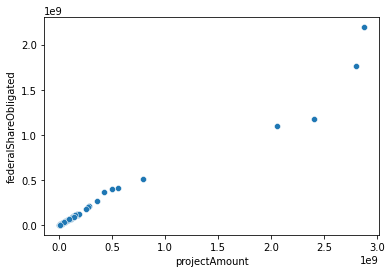

In [28]:
sns.scatterplot(data=state_project_avg, x="projectAmount", y="federalShareObligated")

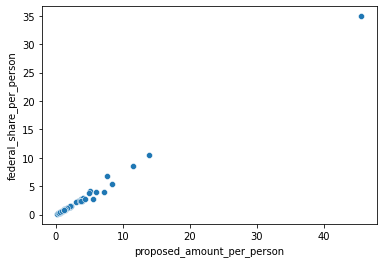

In [29]:
sns.scatterplot(data=state_project_avg, x="proposed_amount_per_person", y="federal_share_per_person")

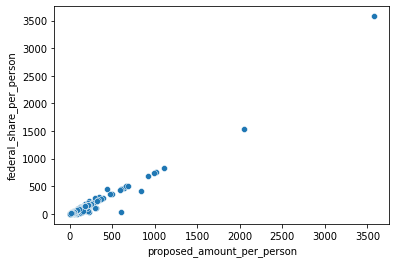

In [30]:
sns.scatterplot(data=county_project_avg, x="proposed_amount_per_person", y="federal_share_per_person")

In [31]:

display(state_project['federal_share_percentage'].describe())
display(state_project['costSharePercentage'].describe())


count    667.000000
mean       0.713454
std        0.116347
min        0.071179
25%        0.704661
50%        0.749292
75%        0.755132
max        1.660718
Name: federal_share_percentage, dtype: float64

count    667.000000
mean       0.765355
std        0.058739
min        0.510000
25%        0.745132
50%        0.750000
75%        0.779306
max        1.000000
Name: costSharePercentage, dtype: float64

# Hazard risk with AVG state/county project

In [32]:
#Expected Annual Loss
EstimatedLossByState = pd.read_csv('NRI_Table_States.csv')
EstimatedLossByState.columns.unique()

Index(['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'AREA', 'EAL_SCORE',
       ...
       'WNTW_EXPA', 'WNTW_EXPT', 'WNTW_EALB', 'WNTW_EALP', 'WNTW_EALPE',
       'WNTW_EALA', 'WNTW_EALT', 'WNTW_EALS', 'WNTW_EALR', 'NRI_VER'],
      dtype='object', length=230)

In [33]:
#information about hazards frequency collection
HazardInfo = pd.read_csv('NRI_HazardInfo.csv')
HazardInfo

OID_             Hazard Prefix           Service      Start    End_  \
0      1          Avalanche   AVLN         Avalanche       1960  2019.0   
1      2   Coastal Flooding   CFLD   CoastalFlooding        NaN     NaN   
2      3          Cold Wave   CWAV          ColdWave       2005  2017.0   
3      4            Drought   DRGT           Drought       2000  2017.0   
4      5         Earthquake   ERQK        Earthquake       2017  2017.0   
5      6               Hail   HAIL              Hail       1986  2017.0   
6      7          Heat Wave   HWAV          HeatWave       2005  2017.0   
7      8          Hurricane   HRCN         Hurricane  1851/1949  2017.0   
8      9          Ice Storm   ISTM          IceStorm       1946  2014.0   
9     10          Landslide   LNDS         Landslide       2010  2019.0   
10    11          Lightning   LTNG         Lightning       1991  2012.0   
11    12  Riverine Flooding   RFLD  RiverineFlooding       1996  2019.0   
12    13        Strong Wind   SWND        StrongWind       1986  2017.0   
13    14            Tornado   TRND           Tornado       1986  2019.0   
14    15            Tsunami   TSUN           Tsunami       1800  2018.0   
15    16  Volcanic Activity   VLCN  VolcanicActivity     9310BC  2018.0   
16    17           Wildfire   WFIR          Wildfire       2016  2016.0   
17    18     Winter Weather   WNTW     WinterWeather       2005  2017.0   

   TotalYears        FrequencyModel  EAL_Building  EAL_Population  \
0          60  Annualized Frequency             1               1   
1         NaN  Annualized Frequency             1               1   
2          12  Annualized Frequency             1               1   
3          18  Annualized Frequency             0               0   
4           1           Probability             1               1   
5          32  Annualized Frequency             1               1   
6          12  Annualized Frequency             1               1   
7      167/69  Annualized Frequency             1               1   
8          67  Annualized Frequency             1               1   
9          10  Annualized Frequency             1               1   
10         22  Annualized Frequency             1               1   
11         24  Annualized Frequency             1               1   
12         32  Annualized Frequency             1               1   
13         34  Annualized Frequency             1               1   
14        219  Annualized Frequency             1               1   
15      11328  Annualized Frequency             1               1   
16          1           Probability             1               1   
17         12  Annualized Frequency             1               1   

    EAL_Agriculture                                     PeriodOfRecord  \
0                 0                               1960-2019 (60 years)   
1                 0                        Various (see documentation)   
2                 1                               2005-2017 (12 years)   
3                 1                               2000-2017 (18 years)   
4                 0                                       2017 dataset   
5                 1                               1986-2017 (32 years)   
6                 1                               2005-2017 (12 years)   
7                 1  East 1851-2017 (167 years) / West 1949-2017 (6...   
8                 0                               1946-2014 (67 years)   
9                 0                               2010-2019 (10 years)   
10                0                               1991-2012 (22 years)   
11                1                               1996-2019 (24 years)   
12                1                               1986-2017 (32 years)   
13                1                               1986-2019 (34 years)   
14                0                              1800-2018 (219 years)   
15                0                          9310BC-2018 (11328 years)   
16      

In [34]:
hazardDic = pd.read_csv("NRIDataDictionary.csv")
display(hazardDic.head(60))

Sort    Field Name                                        Field Alias  \
0      1      OBJECTID                                           OBJECTID   
1      2         Shape                                              Shape   
2      3  Shape_Length                                       Shape_Length   
3      4    Shape_Area                                         Shape_Area   
4      5         STATE                                         State Name   
5      6    STATEABBRV                            State Name Abbreviation   
6      7     STATEFIPS                                    State FIPS Code   
7      8        COUNTY                                        County Name   
8      9    COUNTYTYPE                                        County Type   
9     10    COUNTYFIPS                                   County FIPS Code   
10    11      STCOFIPS                             State-County FIPS Code   
11    12         TRACT                                       Census Tract   
12    13     TRACTFIPS                             Census Tract FIPS Code   
13    14        NRI_ID                             National Risk Index ID   
14    15    POPULATION                                  Population (2016)   
15    16    BUILDVALUE                                 Building Value ($)   
16    17     AGRIVALUE                              Agriculture Value ($)   
17    18          AREA                                       Area (sq mi)   
18    19    RISK_SCORE            National Risk Index - Score - Composite   
19    20    RISK_RATNG           National Risk Index - Rating - Composite   
20    21    RISK_NPCTL  National Risk Index - National Percentile - Co...   
21    22    RISK_SPCTL  National Risk Index - State Percentile - Compo...   
22    23     EAL_SCORE           Expected Annual Loss - Score - Composite   
23    24     EAL_RATNG          Expected Annual Loss - Rating - Composite   
24    25     EAL_NPCTL  Expected Annual Loss - National Percentile - C...   
25    26     EAL_SPCTL  Expected Annual Loss - State Percentile - Comp...   
26    27      EAL_VALT           Expected Annual Loss - Total - Composite   
27    28      EAL_VALB  Expected Annual Loss - Building Value - Composite   
28    29      EAL_VALP      Expected Annual Loss - Population - Composite   
29    30     EAL_VALPE  Expected Annual Loss - Population Equivalence ...   
30    31      EAL_VALA  Expected Annual Loss - Agriculture Value - Com...   
31    32    SOVI_SCORE                       Social Vulnerability - Score   
32    33    SOVI_RATNG                      Social Vulnerability - Rating   
33    34    SOVI_NPCTL         Social Vulnerability - National Percentile   
34    35    SOVI_SPCTL            Social Vulnerability - State Percentile   
35    36    SOVI_VALUE                       Social Vulnerability - Value   
36    37    RESL_SCORE                       Community Resilience - Score   
37    38    RESL_RATNG                      Community Resilience - Rating   
38    39    RESL_NPCTL         Community Resilience - National Percentile   
39    40    RESL_SPCTL            Community Resilience - State Percentile   
40    41    RESL_VALUE                       Community Resilience - Value   
41    42    AVLN_EVNTS                       Avalanche - Number of Events   
42    43    AVLN_AFREQ                   Avalanche - Annualized Frequency   
43    44     AVLN_EXPB              Avalanche - Exposure - Building Value   
44    45     AVLN_EXPP                  Avalanche - Exposure - Population   
45    46    AVLN_EXPPE      Avalanche - Exposure - Population Equivalence   
46    47     AVLN_EXPT                       Avalanche - Exposure - Total   
47    48     AVLN_HLRB        Avalanche - Historic Loss Ratio - Buildings   
48    49     AVLN_HLRP       Avalanche - Historic Loss Ratio - Population   
49    50     AVLN_HLRR     Avalanche - Historic Loss Ratio - Total Rating   
50    51     AVLN_EALB  Avalanche - Expected Annual Loss - Building Value   


In [35]:
#Hazard Indices by County
HazardsByCounty = pd.read_csv('NRI_Table_Counties.csv')
HazardsByCounty

OID_  NRI_ID     STATE STATEABBRV  STATEFIPS      COUNTY COUNTYTYPE  \
0        1  C21115  Kentucky         KY         21     Johnson     County   
1        2  C21117  Kentucky         KY         21      Kenton     County   
2        3  C21119  Kentucky         KY         21       Knott     County   
3        4  C21121  Kentucky         KY         21        Knox     County   
4        5  C21123  Kentucky         KY         21       Larue     County   
...    ...     ...       ...        ...        ...         ...        ...   
3137  3138  C56037   Wyoming         WY         56  Sweetwater     County   
3138  3139  C56039   Wyoming         WY         56       Teton     County   
3139  3140  C56041   Wyoming         WY         56       Uinta     County   
3140  3141  C56043   Wyoming         WY         56    Washakie     County   
3141  3142  C56045   Wyoming         WY         56      Weston     County   

      COUNTYFIPS  STCOFIPS  POPULATION  ...     WNTW_EALB  WNTW_EALP  \
0            115     21115       23356  ...    781.792240   0.006129   
1            117     21117      159720  ...  18249.808380   0.006048   
2            119     21119       16346  ...    249.454293   0.004021   
3            121     21121       31883  ...  17055.601129   0.005838   
4            123     21123       14193  ...   9662.424572   0.000390   
...          ...       ...         ...  ...           ...        ...   
3137          37     56037       43806  ...    165.637265   0.003126   
3138          39     56039       21294  ...   2688.566845   0.001068   
3139          41     56041       21118  ...     63.272547   0.010158   
3140          43     56043        8533  ...    119.536607   0.000703   
3141          45     56045        7208  ...  11958.552736   0.003682   

        WNTW_EALPE   WNTW_EALA     WNTW_EALT  WNTW_EALS            WNTW_EALR  \
0     46577.171552    4.235939  47363.199731  19.448529  Relatively Moderate   
1     45965.118059   44.606252  64259.532691  21.530408  Relatively Moderate   
2     30560.277236    0.023091  30809.754620  16.851393       Relatively Low   
3     44371.625150    0.082573  61427.308851  21.209328  Relatively Moderate   
4      2961.292206  246.668438  12870.385216  12.597091       Relatively Low   
...            ...         ...           ...        ...                  ...   
3137  23755.525159    0.000041  23921.162465  15.488184       Relatively Low   
3138   8118.192272    0.000078  10806.759196  11.884244       Relatively Low   
3139  77199.713455   27.256486  77290.242488  22.897143  Relatively Moderate   
3140   5345.785169    1.415514   5466.737290   9.469255             Very Low   
3141  27981.258513    6.880699  39946.691949  18.375254       Relatively Low   

      WNTW_RISKS           WNTW_RISKR        NRI_VER  
0      14.131237       Relatively Low  November 2021  
1      12.470040       Relatively Low  November 2021  
2      14.466270       Relatively Low  November 2021  
3      19.585915  Relatively Moderate  November 2021  
4       7.715952             Very Low  November 2021  
...          ...                  ...            ...  
3137    5.189094             Very Low  November 2021  
3138    4.816165             Very Low  November 2021  
3139   11.296648       Relatively Low  November 2021  
3140    8.193083             Very Low  November 2021  
3141   10.777060       Relatively Low  November 2021  

[3142 rows x 365 columns]

## Add hazards to avg county projects

In [36]:
HazardsByCounty = HazardsByCounty.drop(columns="POPULATION")
hazard_county = HazardsByCounty.iloc[:,2:35].copy()
hazard_county.rename(columns = {'STATEFIPS':'stateNumberCode', 'COUNTYFIPS':'countyCode', 'STATE':'state', 'COUNTY':'county'}, inplace = True)
county_project_risk = hazard_county.merge(county_project_avg, on=["stateNumberCode", "countyCode", "state", "county"])
county_project_risk

state STATEABBRV  stateNumberCode    county COUNTYTYPE  countyCode  \
0     Kentucky         KY               21   Johnson     County         115   
1     Kentucky         KY               21    Kenton     County         117   
2     Kentucky         KY               21      Knox     County         121   
3     Kentucky         KY               21     Larue     County         123   
4     Kentucky         KY               21    Laurel     County         125   
...        ...        ...              ...       ...        ...         ...   
2171   Wyoming         WY               56  Niobrara     County          27   
2172   Wyoming         WY               56  Sheridan     County          33   
2173   Wyoming         WY               56  Sublette     County          35   
2174   Wyoming         WY               56     Teton     County          39   
2175   Wyoming         WY               56    Weston     County          45   

      STCOFIPS    BUILDVALUE   AGRIVALUE         AREA  ...  count  \
0        21115  1.924008e+09    706000.0   261.958144  ...     15   
1        21117  1.877338e+10   5390000.0   160.213975  ...     34   
2        21121  2.135773e+09   2534000.0   386.298435  ...      1   
3        21123  1.221343e+09  41112000.0   261.539564  ...      9   
4        21125  4.901468e+09  15426000.0   433.957784  ...      3   
...        ...           ...         ...          ...  ...    ...   
2171     56027  3.215390e+08  49684000.0  2626.026683  ...      1   
2172     56033  4.084336e+09  59674000.0  2523.483119  ...      5   
2173     56035  1.489304e+09  47872000.0  4886.479555  ...      1   
2174     56039  3.476594e+09  17582000.0  3996.855337  ...      1   
2175     56045  7.744440e+08  34274000.0  2398.003888  ...      1   

     costSharePercentage  projectAmount  federalShareObligated  \
0                   0.75     3661455.01             2746056.81   
1                   0.75     3352193.00             2313010.68   
2                   0.75       35471.00               26603.00   
3                   0.75      184571.00              138421.00   
4                   0.75      893104.00              669826.00   
...                  ...            ...                    ...   
2171                0.75      454991.11              341243.34   
2172                0.75      531960.00              398970.81   
2173                0.75      311751.67              233813.75   
2174                0.75      120791.00               90593.00   
2175                0.75      111993.07               83994.80   

      disasterNumber benefitCostRatio  netValueBenefits  \
0            32824.0         1.261833         9089924.0   
1            25791.0         3.867825         9209051.0   
2             1407.0         0.000000               0.0   
3             5454.0         0.000000               0.0   
4            10187.0         0.489000         1133020.0   
...              ...              ...               ...   
2171          4227.0         1.000000          507840.0   
2172         12241.0         2.548500         1726250.0   
2173          5241.0         1.040000          660704.0   
2174          1351.0         1.119000          139210.0   
2175          4306.0         6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                      26.253848                 19.690142   
1                       5.245872                  3.630763   
2                       1.122642                  0.841974   
3                      13.558437                 10.168295   
4                       5.129208                  3.846895   
...                          ...                       ...   
2171                  182.874240                137.155683   
2172                    9.001844                  6.751397   
2173                   31.990936                 23.993202   
2174                    6.576523                  4.932379   
2175                   15.511506               

## Heatmap: county project risk

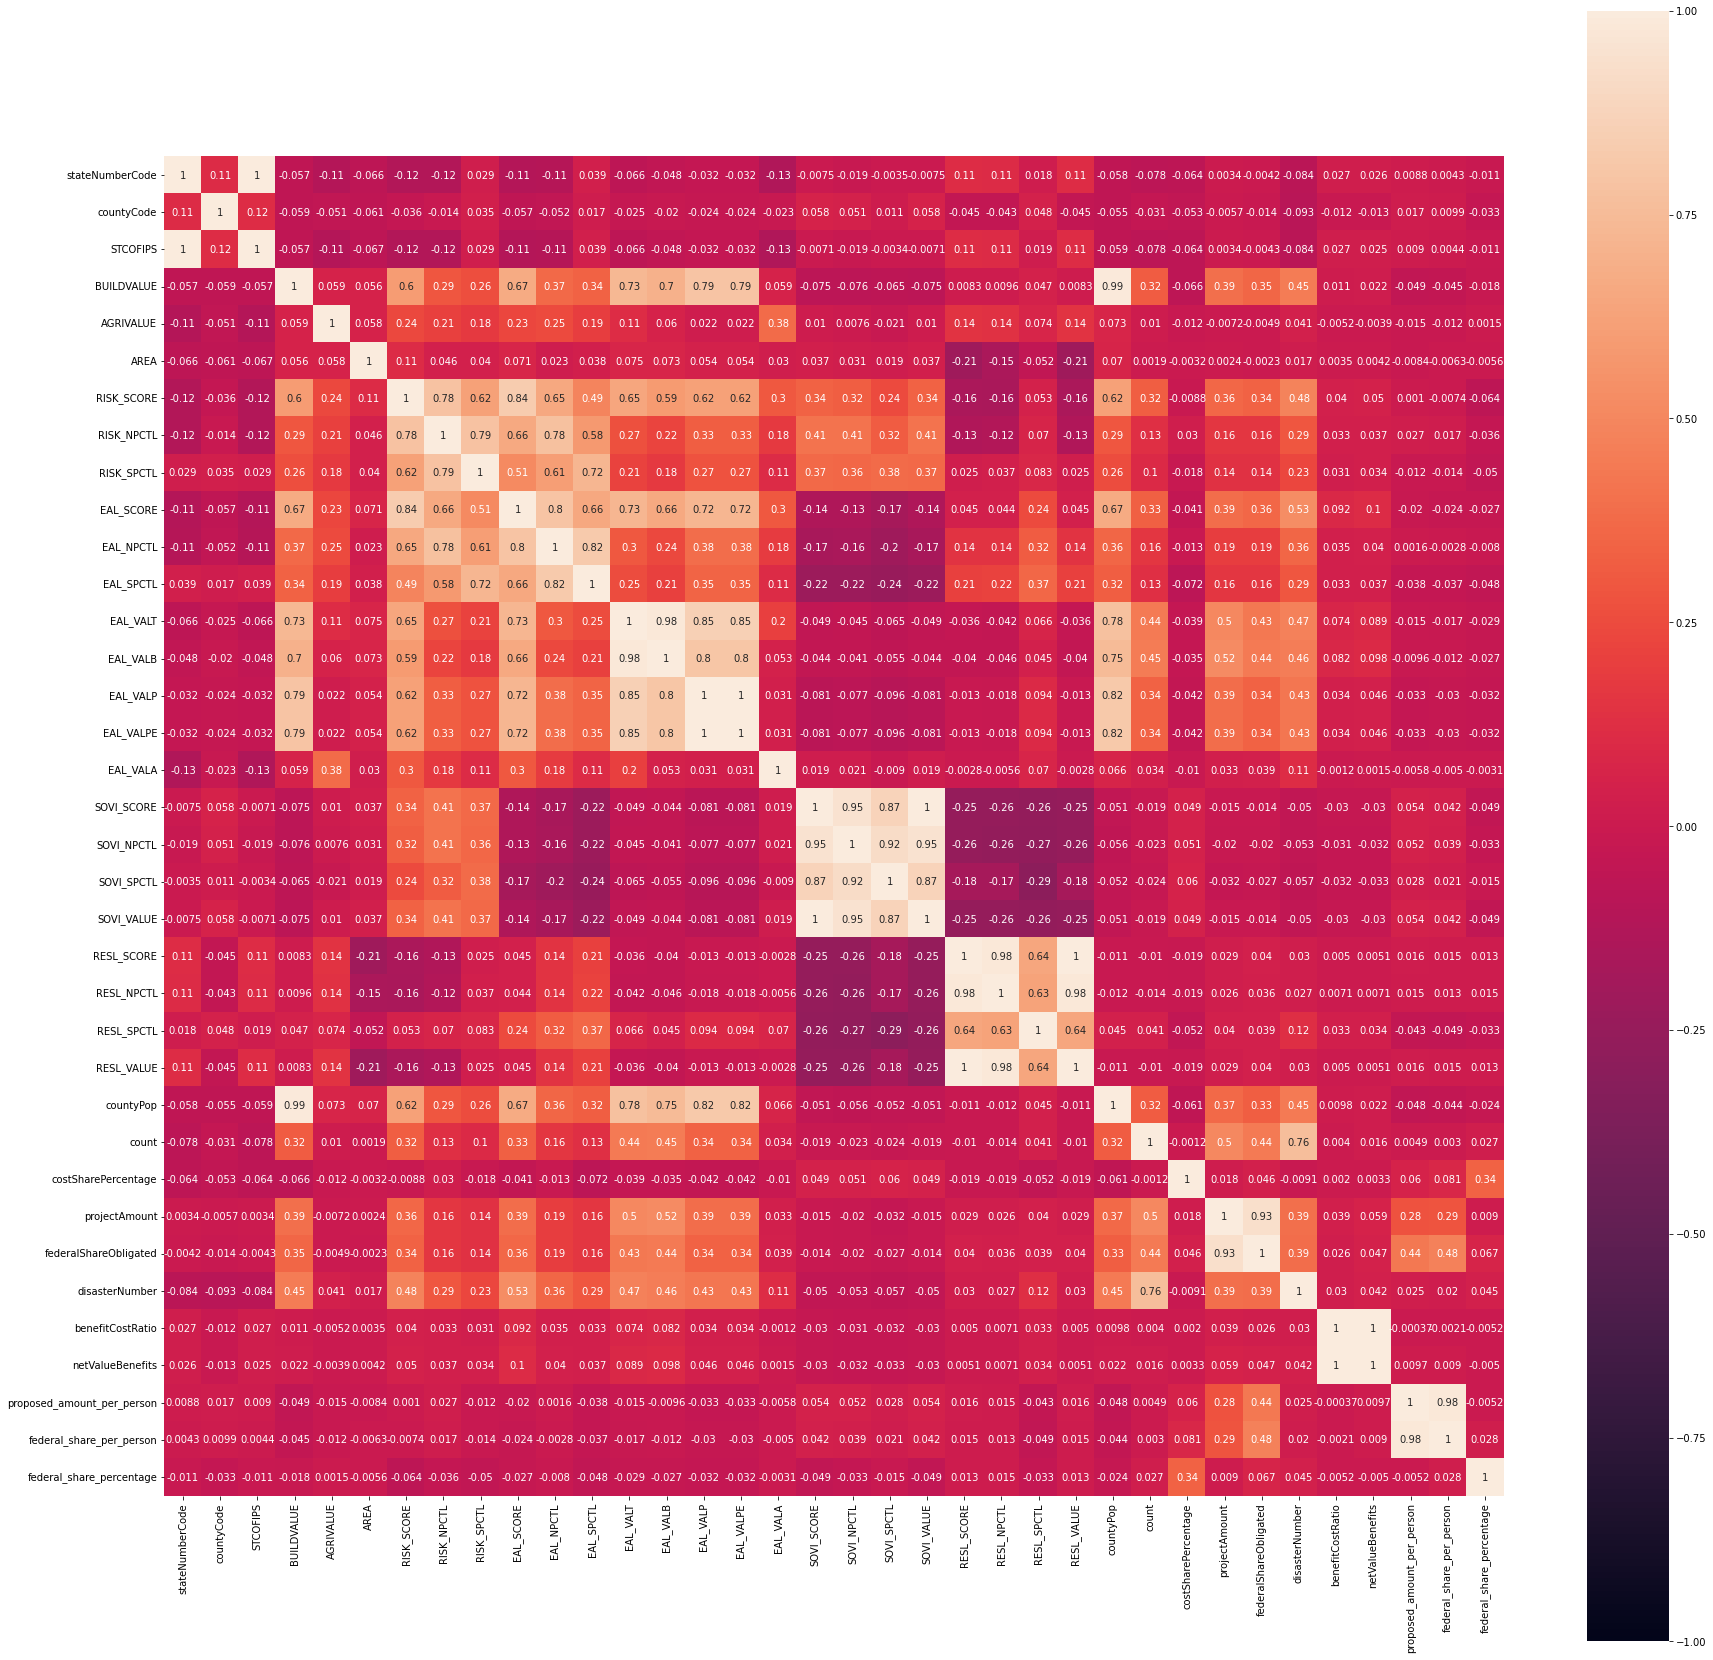

In [37]:
corr = county_project_risk.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

## Add estimated loss to avg state projects

In [38]:
hazardScore = EstimatedLossByState.iloc[:,[4, 6, 7, 8, 9]].copy()
hazardScore.rename(columns = {'STATEFIPS':'stateNumberCode'}, inplace = True)
state_project_loss = hazardScore.merge(state_project_avg, on=["stateNumberCode"])
state_project_loss

stateNumberCode    BUILDVALUE     AGRIVALUE           AREA   EAL_SCORE  \
0                 1  5.026065e+11  5.880985e+09   50646.710241   34.608908   
1                 2  9.066546e+10  7.045900e+07  570885.873384   16.044408   
2                 4  6.314331e+11  2.548788e+09  113590.691628   25.714888   
3                 5  2.909845e+11  9.434198e+09   52034.233206   33.859489   
4                 6  3.848852e+12  2.885307e+10  155785.663611  100.000000   
5                 8  5.765004e+11  7.489216e+09  103639.801774   32.676690   
6                 9  4.882425e+11  5.801130e+08    4842.730398    8.604415   
7                10  1.214668e+11  1.465973e+09    1948.749875    4.572907   
8                11  9.416670e+10  0.000000e+00      61.139885    0.614673   
9                12  2.219664e+12  7.355867e+09   53633.983728   57.272742   
10               13  1.074502e+12  9.482694e+09   57597.740485   36.858424   
11               15  1.507937e+11  5.638030e+08    6422.466128   17.897500   
12               16  1.516199e+11  7.567442e+09   82644.422957   17.085092   
13               17  1.623142e+12  1.672236e+10   55515.334097   42.461740   
14               18  7.621680e+11  1.110734e+10   35825.541717   31.841498   
15               19  3.849535e+11  2.895645e+10   55855.120784   36.821397   
16               20  3.350606e+11  1.848575e+10   81758.318563   35.409937   
17               21  4.666170e+11  5.737925e+09   39485.142970   32.657054   
18               22  4.582162e+11  3.172981e+09   43206.668295   48.134266   
19               23  1.626733e+11  5.771090e+08   30844.070403    8.009059   
20               24  7.829065e+11  2.472806e+09    9710.734083   21.693277   
21               25  8.862250e+11  4.616940e+08    7800.915827   15.438873   
22               26  1.251426e+12  8.220934e+09   56559.333776   28.359947   
23               27  7.129711e+11  1.839539e+10   79625.497352   33.412303   
24               28  2.805185e+11  5.762130e+09   46923.075137   36.048178   
25               29  7.095642e+11  1.037479e+10   68746.247592   42.907644   
26               30  1.080463e+11  3.520624e+09  145545.349775   12.083001   
27               31  2.154281e+11  2.194526e+10   76818.068485   31.223741   
28               32  2.872489e+11  6.623660e+08  109780.121839   27.621223   
29               33  1.686871e+11  1.877950e+08    8952.719064    6.040878   
30               34  1.137709e+12  1.094579e+09    7355.136271   42.489384   
31               35  1.839210e+11  2.577123e+09  121309.933932   18.248144   
32               36  2.335042e+12  5.357385e+09   47123.360197   32.738856   
33               37  1.045401e+12  1.254440e+10   48617.852910   46.135840   
34               38  7.881308e+10  8.234101e+09   69000.451886   16.559629   
35               39  1.434964e+12  9.341233e+09   40862.442001   31.400740   
36               40  4.031740e+11  7.465507e+09   68596.599475   37.104862   
37               41  4.096201e+11  4.963060e+09   95986.628562   35.908443   
38               42  1.470727e+12  7.758879e+09   44742.070179   30.165573   
39               44  1.337965e+11  5.800000e+07    1033.980206    0.151235   
40               45  4.889510e+11  2.992734e+09   30062.956351   31.600940   
41               46  8.964568e+10  9.721522e+09   75809.285558   21.694943   
42               47  6.853868e+11  3.698127e+09   41234.927486   40.995986   
43               48  2.597201e+12  2.446349e+10  261252.802529   85.965615   
44               49  2.499685e+11  1.838610e+09   82195.264942   25.446030   
45               50  8.134404e+10  7.809700e+08    9217.589715    2.692563   
46               51  1.010543e+12  3.821150e+09   39480.566622   26.478262   
47               53  7.413408e+11  9.104311e+09   66452.710267   45.902110   
48               54  1.958574e+11  7.542730e+08   24040.896848   13.156865   
49               55  7.435392e+11  1.129026e+10   54160.637232   24.048003   
50               56  6.170

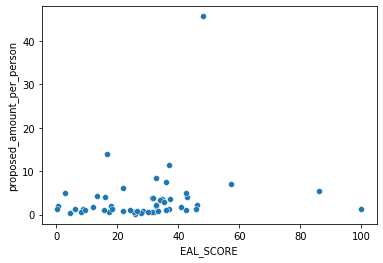

In [39]:
sns.scatterplot(data=state_project_loss, x="EAL_SCORE", y="proposed_amount_per_person")

## Heatmap: state project loss

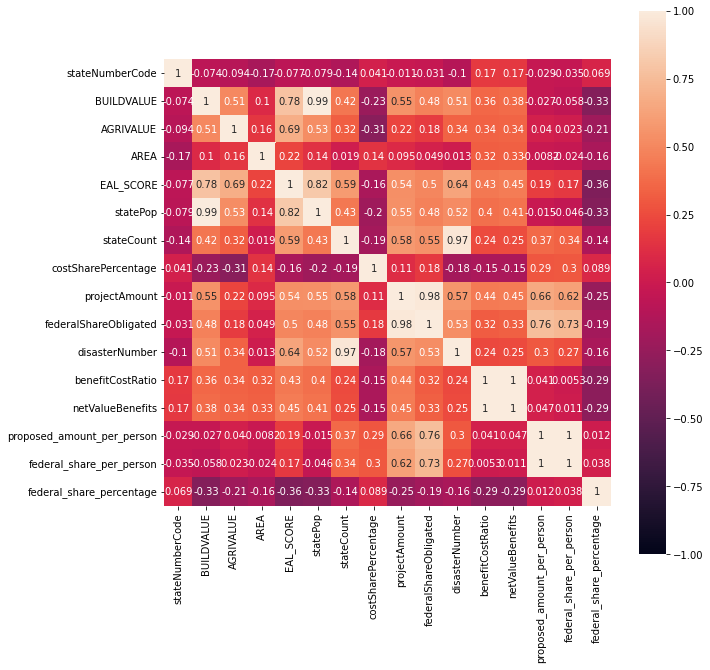

In [40]:
corr = state_project_loss.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)
# high positive corr
# EAL_SCORE vs statePop / build value, proposed_amount per person vs federal share per person, statePop vs build value, 

# T test for high risk and low risk counties

In [41]:
Counter(HazardsByCounty.RISK_RATNG)

Counter({'Relatively High': 129,
         'Relatively Low': 1215,
         'Relatively Moderate': 518,
         'Very High': 21,
         'Very Low': 1259})

In [42]:
low_risk_county = county_project_risk[county_project_risk.RISK_RATNG == "Very Low"]
high_risk_county = county_project_risk[(county_project_risk.RISK_RATNG == "Very High") | (county_project_risk.RISK_RATNG == "Relatively High")]
display(low_risk_county.shape)
display(high_risk_county.shape)

(772, 44)

(124, 44)

In [43]:
one_hundred_high_risk = high_risk_county.sample(n=100)
one_hundred_low_risk = low_risk_county.sample(n=100)
one_hundred_high_risk.columns

Index(['state', 'STATEABBRV', 'stateNumberCode', 'county', 'COUNTYTYPE',
       'countyCode', 'STCOFIPS', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_SCORE', 'RISK_RATNG', 'RISK_NPCTL', 'RISK_SPCTL', 'EAL_SCORE',
       'EAL_RATNG', 'EAL_NPCTL', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB',
       'EAL_VALP', 'EAL_VALPE', 'EAL_VALA', 'SOVI_SCORE', 'SOVI_RATNG',
       'SOVI_NPCTL', 'SOVI_SPCTL', 'SOVI_VALUE', 'RESL_SCORE', 'RESL_RATNG',
       'RESL_NPCTL', 'RESL_SPCTL', 'RESL_VALUE', 'countyPop', 'count',
       'costSharePercentage', 'projectAmount', 'federalShareObligated',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'proposed_amount_per_person', 'federal_share_per_person',
       'federal_share_percentage'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ttest_indResult(statistic=-0.2437294764741616, pvalue=0.8076926890206848)

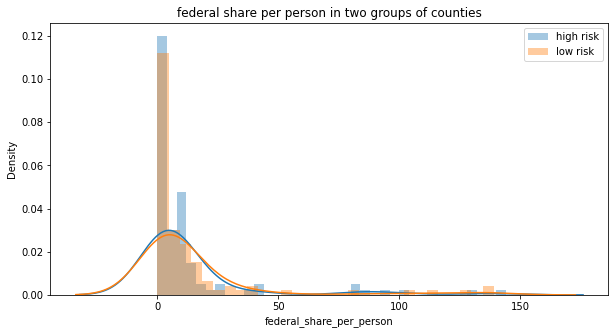

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(one_hundred_high_risk.federal_share_per_person, label="high risk", hist=True, kde=True)
sns.distplot(one_hundred_low_risk.federal_share_per_person, label="low risk", hist=True, kde=True)
plt.title("federal share per person in two groups of counties")
plt.legend()

stats.ttest_ind(one_hundred_high_risk.federal_share_per_person, one_hundred_low_risk.federal_share_per_person)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ttest_indResult(statistic=-4.752182321742477, pvalue=3.861997566440196e-06)

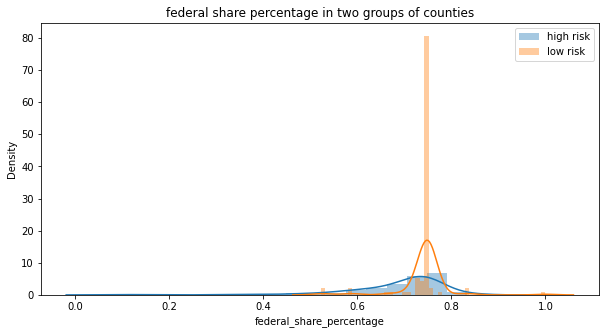

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(one_hundred_high_risk.federal_share_percentage, label="high risk", hist=True, kde=True)
sns.distplot(one_hundred_low_risk.federal_share_percentage, label="low risk", hist=True, kde=True)
plt.title("federal share percentage in two groups of counties")
plt.legend()

stats.ttest_ind(one_hundred_high_risk.federal_share_percentage, one_hundred_low_risk.federal_share_percentage)

# Regression of federal share obligated

[Text(0.5, 1.0, 'project amount vs. federal share obligated')]

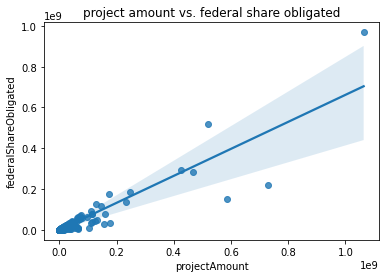

In [46]:
sns.regplot(data=county_project, x="projectAmount", y="federalShareObligated").set(title="project amount vs. federal share obligated")

[Text(0.5, 1.0, 'proposed amount per person vs. federal share per person')]

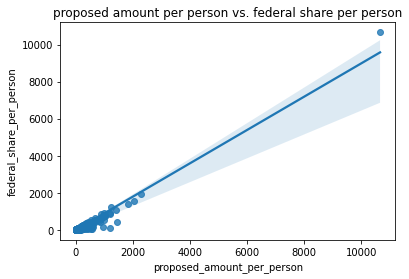

In [47]:
sns.regplot(data=county_project, x="proposed_amount_per_person", y="federal_share_per_person").set(title="proposed amount per person vs. federal share per person")

In [48]:
county_project[county_project.proposed_amount_per_person>10000]

stateNumberCode  countyCode     state  county  programFy  countyPop  \
4588               36          39  New York  Greene       2013      48587   

      count  costSharePercentage  projectAmount  federalShareObligated  \
4588      4                0.875    518155133.0            518123545.0   

      disasterNumber  benefitCostRatio  netValueBenefits  \
4588          8170.0            2.1925      2.313779e+09   

      proposed_amount_per_person  federal_share_per_person  \
4588                 10664.48089              10663.830757   

      federal_share_percentage  
4588                  0.999939

[Text(0.5, 1.0, 'proposed cost share percentage vs. federal share percentage')]

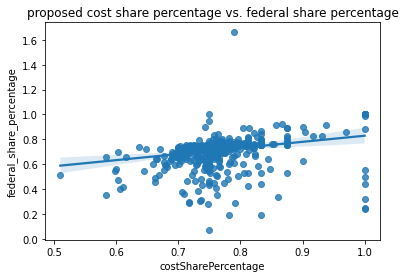

In [49]:
sns.regplot(data=state_project, x="costSharePercentage", y="federal_share_percentage").set(title="proposed cost share percentage vs. federal share percentage")

# Heatmap: the weight of different hazards for national risk index score

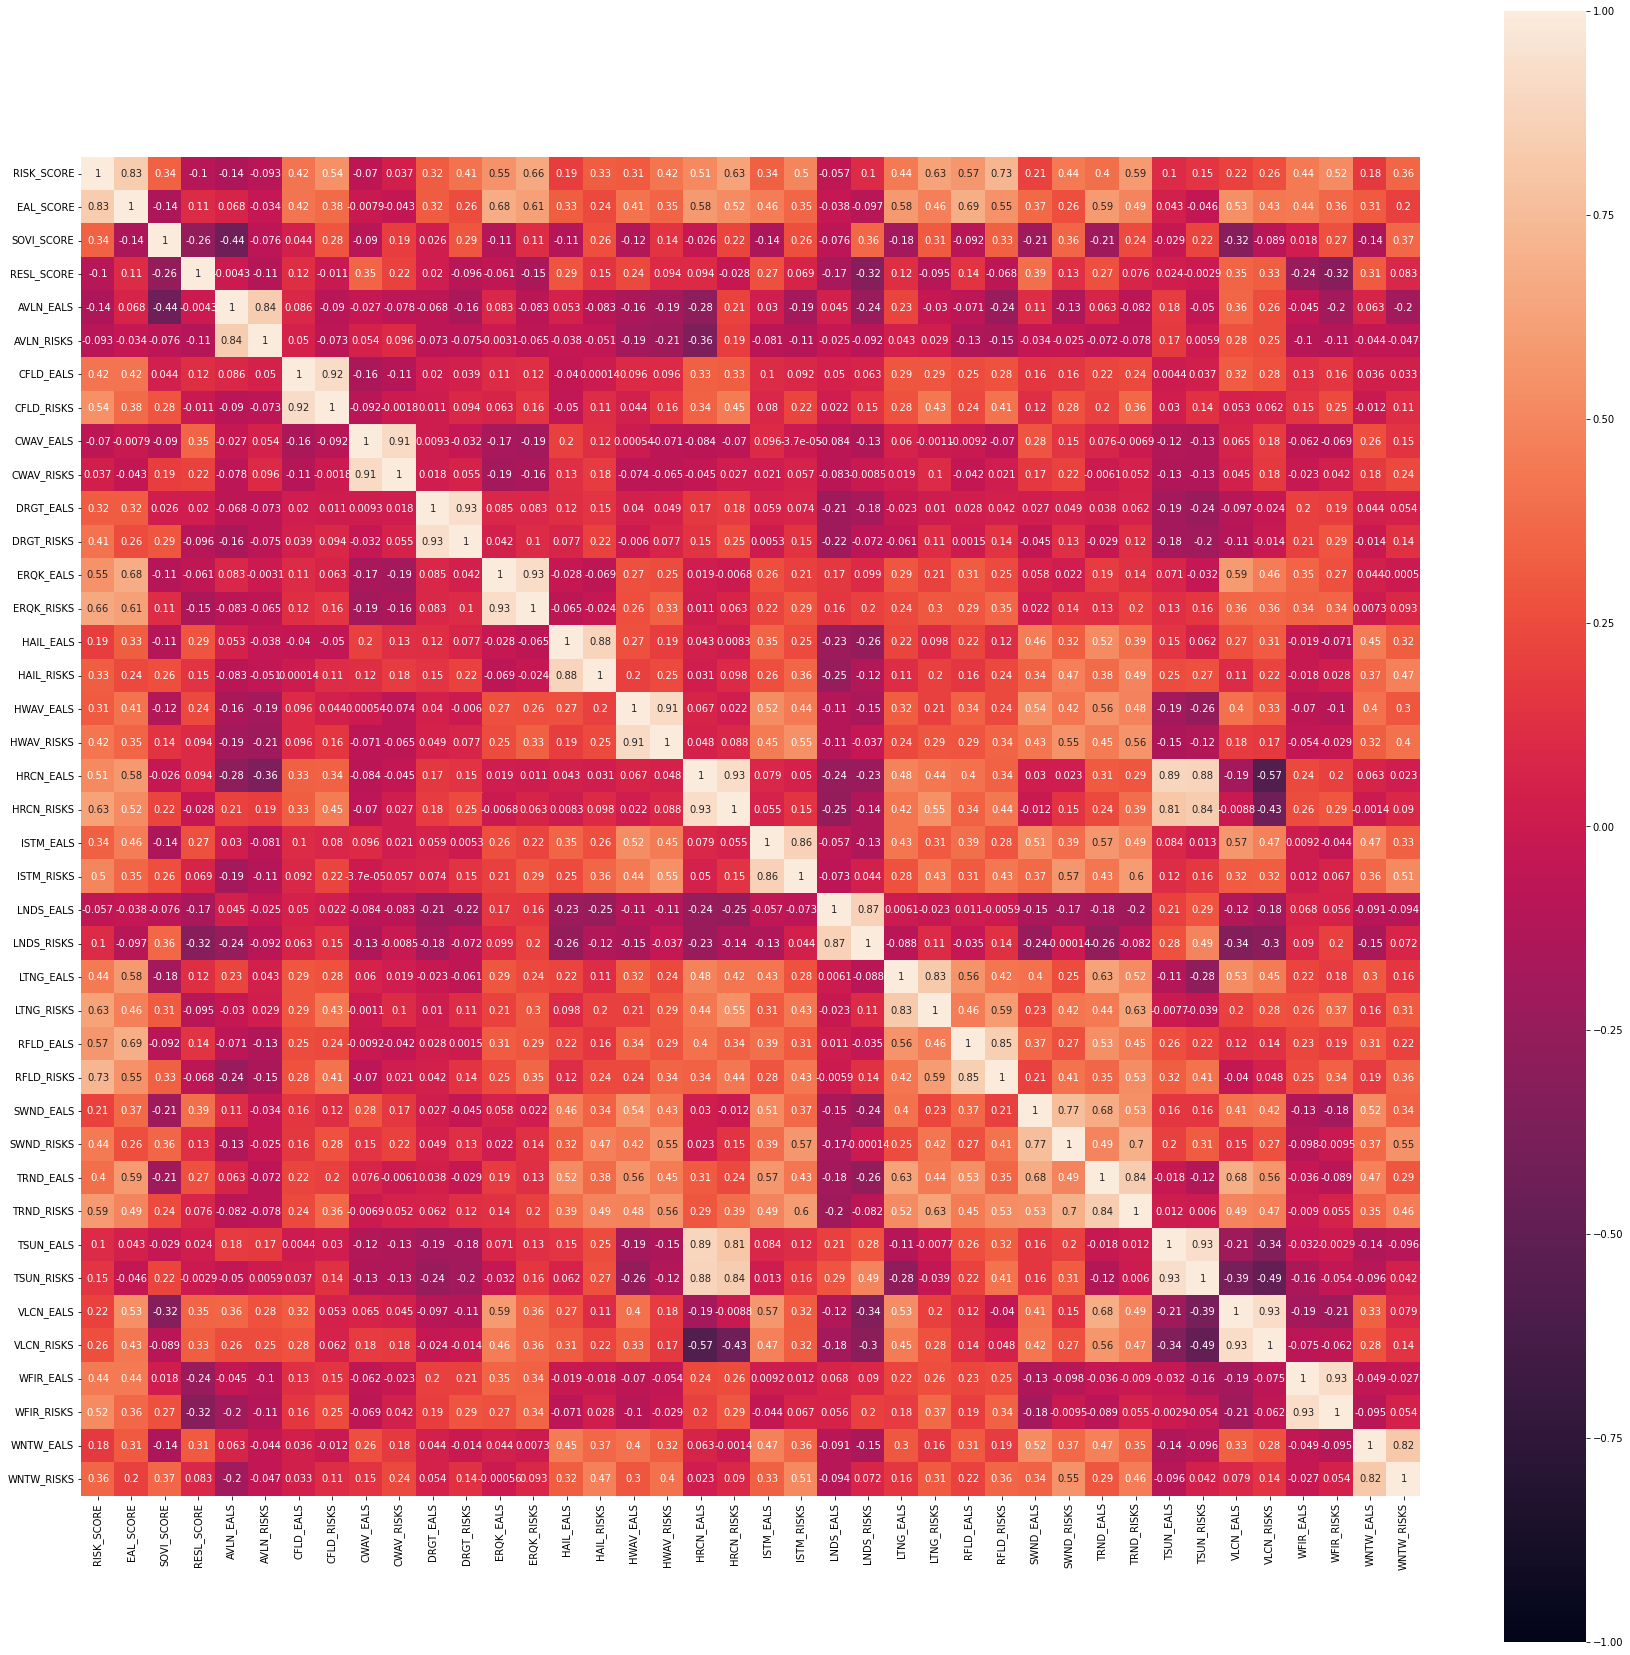

In [50]:
from numpy.ma.core import append
hazard_columns = HazardsByCounty.columns
scores = []
# targets are any scores
for column in hazard_columns:
  if "SCORE" in column or "RISKS" in column or "EALS" in column:
    scores.append(column)

hazard_scores = HazardsByCounty[scores]
score_corr = hazard_scores.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(score_corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

national risk index score replys on the estimated annual losss score. It's not heavily depends on a single hazard risk core and not evenly. But for each hazard risk score, it depends on the hazard annual loss score.

# Income, median household from wiki

In [51]:
from bs4 import BeautifulSoup
import requests

html = requests.get('https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income')

soup = BeautifulSoup(html.text, 'html5lib')

In [52]:
tables = soup('table', {'class': 'wikitable sortable'})
# this is the table we need
income_table = tables[0]
# forget the column titles
income_rows = income_table('tr')[1:]
rank_column=[]
county_column=[]
state_column=[]
per_capita_income_column=[]
median_household_income_column=[]
median_family_income_column=[]
num_household_column=[]
# some rows that represents nothing in rank means state level; missing value in county or state means thats row for percentage
for row in income_rows:
  if( row('td')[0].text!="\n" and "—" not in row('td')[0].text and "%" not in row('td')[0].text):
    rank_column.append(row('td')[0].text.strip("\n"))
    county_column.append(row('td')[1].text.replace(" County", "").replace(" City", "").strip("\n"))
    state_column.append(row('td')[2].text.strip("\n"))
    per_capita_income_column.append(row('td')[3].text.replace("$", "").replace(",","").strip("\n"))
    median_household_income_column.append(row('td')[4].text.replace("$", "").replace(",","").strip("\n"))
    median_family_income_column.append(row('td')[5].text.replace("$", "").replace(",","").strip("\n"))
    num_household_column.append(row('td')[6].text.replace(",","").strip("\n"))



In [53]:
income = pd.DataFrame({'rank':rank_column, 'county':county_column, 'state':state_column, 'per capita income':per_capita_income_column, 'median household income': median_household_income_column, 'median family income': median_family_income_column, 'number of household': num_household_column})
income = income.astype({'rank':'int','per capita income':'float', 'median household income':'float', 'median family income':'float', 'number of household':'float'})
income.describe()

rank  per capita income  median household income  \
count  3143.000000        3143.000000              3143.000000   
mean   1572.000000       23634.050589             45946.741648   
std     907.450274        5655.299026             11975.080836   
min       1.000000        8768.000000             19986.000000   
25%     786.500000       19910.000000             38184.500000   
50%    1572.000000       22906.000000             44156.000000   
75%    2357.500000       26247.500000             51171.000000   
max    3143.000000       76592.000000            124055.000000   

       median family income  number of household  
count           3143.000000         3.143000e+03  
mean           56674.479478         9.916507e+04  
std            13731.046446         3.167330e+05  
min            25304.000000         7.100000e+01  
25%            47595.000000         1.105400e+04  
50%            54936.000000         2.581500e+04  
75%            63149.000000         6.708650e+04  
max           152857.000000         9.893481e+06

In [54]:
income.columns

Index(['rank', 'county', 'state', 'per capita income',
       'median household income', 'median family income',
       'number of household'],
      dtype='object')

In [55]:
county_project_avg

stateNumberCode  countyCode    state     county     countyPop  count  \
0                   1           0  Alabama  Statewide  4.706828e+06     99   
1                   1           1  Alabama    Autauga  4.914500e+04     36   
2                   1           3  Alabama    Baldwin  1.793134e+05    673   
3                   1           5  Alabama    Barbour  2.959700e+04      2   
4                   1           7  Alabama       Bibb  2.170500e+04     46   
...               ...         ...      ...        ...           ...    ...   
2532               56          27  Wyoming   Niobrara  2.488000e+03      1   
2533               56          33  Wyoming   Sheridan  2.950000e+04      5   
2534               56          35  Wyoming   Sublette  9.745000e+03      1   
2535               56          39  Wyoming      Teton  1.836700e+04      1   
2536               56          45  Wyoming     Weston  7.220000e+03      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.886964    18167898.17            15219667.32   
1                0.699074     1718574.00             1224887.00   
2                0.741669    28518186.00            24040371.25   
3                0.830000       21338.00               18845.00   
4                0.735000     2931436.47             2146000.13   
...                   ...            ...                    ...   
2532             0.750000      454991.11              341243.34   
2533             0.750000      531960.00              398970.81   
2534             0.750000      311751.67              233813.75   
2535             0.750000      120791.00               90593.00   
2536             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            94212.0          0.000000               0.0   
1            29971.0          2.788352        19096405.0   
2           116299.0          4.959370       293109375.0   
3             3394.0          1.089000          165806.0   
4            18078.0          4.365889        14733224.0   
...              ...               ...               ...   
2532          4227.0          1.000000          507840.0   
2533         12241.0          2.548500         1726250.0   
2534          5241.0          1.040000          660704.0   
2535          1351.0          1.119000          139210.0   
2536          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       0.279652                  0.233568   
1                       3.886101                  2.769485   
2                      19.429245                 16.506251   
3                       0.361297                  0.319227   
4                      45.505311                 33.360198   
...                          ...                       ...   
2532                  182.874240                137.155683   
2533                    9.001844                  6.751397   
2534                   31.990936                 23.993202   
2535                    6.576523                  4.932379   
2536                   15.511506                 11.633629   

      federal_share_percentage  
0                     0.878059  
1                     0.700984  
2                     0.748560  
3                     0.830672  
4                     0.722741  
...                        ...  
2532                  0.750000  
2533                  0.750002  
2534                  0.750000  
2535                  0.749998  
2536                  0.750000  

[2537 rows x 15 columns]

In [56]:
county_project_income = county_project_avg.merge(income, on=["state", "county"])
county_project_income

stateNumberCode  countyCode    state    county      countyPop  count  \
0                   1           1  Alabama   Autauga   49145.000000     36   
1                   1           3  Alabama   Baldwin  179313.444444    673   
2                   1           5  Alabama   Barbour   29597.000000      2   
3                   1           7  Alabama      Bibb   21705.000000     46   
4                   1          11  Alabama   Bullock   10930.500000      2   
...               ...         ...      ...       ...            ...    ...   
2178               56          27  Wyoming  Niobrara    2488.000000      1   
2179               56          33  Wyoming  Sheridan   29500.000000      5   
2180               56          35  Wyoming  Sublette    9745.000000      1   
2181               56          39  Wyoming     Teton   18367.000000      1   
2182               56          45  Wyoming    Weston    7220.000000      1   

      costSharePercentage  projectAmount  federalShareObligated  \
0                0.699074     1718574.00             1224887.00   
1                0.741669    28518186.00            24040371.25   
2                0.830000       21338.00               18845.00   
3                0.735000     2931436.47             2146000.13   
4                0.690000       38634.00               26726.00   
...                   ...            ...                    ...   
2178             0.750000      454991.11              341243.34   
2179             0.750000      531960.00              398970.81   
2180             0.750000      311751.67              233813.75   
2181             0.750000      120791.00               90593.00   
2182             0.750000      111993.07               83994.80   

      disasterNumber  benefitCostRatio  netValueBenefits  \
0            29971.0          2.788352        19096405.0   
1           116299.0          4.959370       293109375.0   
2             3394.0          1.089000          165806.0   
3            18078.0          4.365889        14733224.0   
4             3837.0          0.685500           21420.0   
...              ...               ...               ...   
2178          4227.0          1.000000          507840.0   
2179         12241.0          2.548500         1726250.0   
2180          5241.0          1.040000          660704.0   
2181          1351.0          1.119000          139210.0   
2182          4306.0          6.222000         2115692.0   

      proposed_amount_per_person  federal_share_per_person  \
0                       3.886101                  2.769485   
1                      19.429245                 16.506251   
2                       0.361297                  0.319227   
3                      45.505311                 33.360198   
4                       1.767156                  1.221951   
...                          ...                       ...   
2178                  182.874240                137.155683   
2179                    9.001844                  6.751397   
2180                   31.990936                 23.993202   
2181                    6.576523                  4.932379   
2182                   15.511506                 11.633629   

      federal_share_percentage  rank  per capita income  \
0                     0.700984  1142            24571.0   
1                     0.748560   694            26766.0   
2                     0.830672  2947            16829.0   
3                     0.722741  2865            17427.0   
4                     0.690802  2662            18628.0   
...                        ...   ...                ...   
2178                  0.750000   690            26797.0   
2179                  0.750002   501            27948.0   
2180                  0.750000   106            35944.0   
2181                  0.749998    29            43444.0   
2182                  0.750000   417            28764.0   

      median household income  median family income  number of household  
0             

## Heatmap: county project income

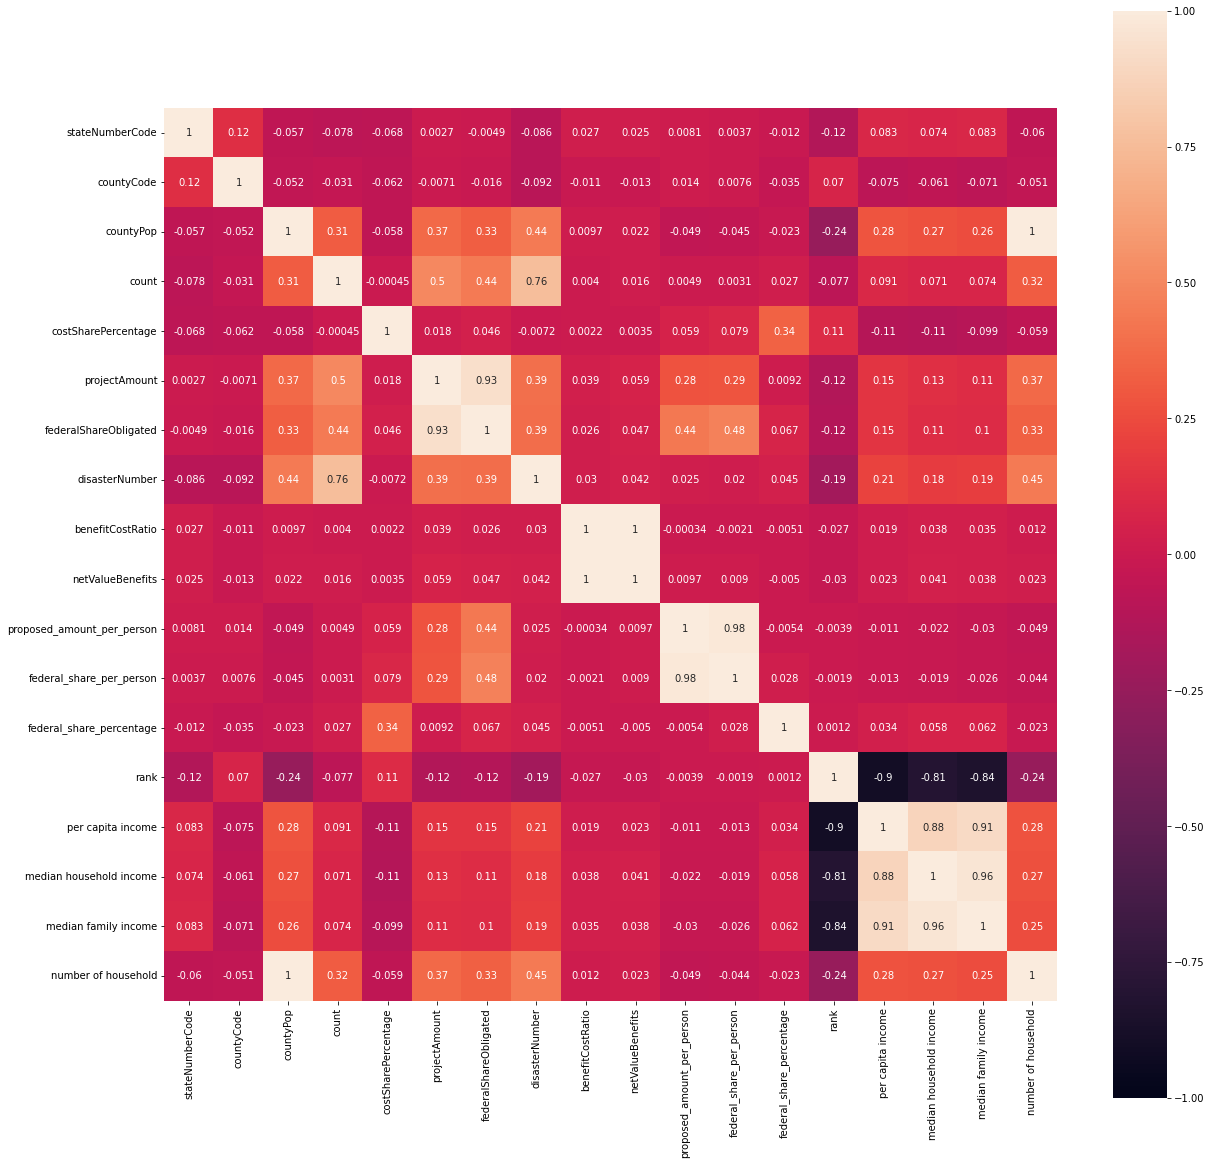

In [57]:
income_corr = county_project_income.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(income_corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

It looks like income is not really strongly correlated with FEMA obligated amounts.

# Load GDP datasets, add GDP per capita and avg yearly GDP

In [58]:
gdp = pd.read_csv("GDP_1997_2021.csv")
gdp.head()


GeoFIPS        GeoName Region TableName  LineCode IndustryClassification  \
0   "00000"  United States           SAGDP1       1.0                    ...   
1   "00000"  United States           SAGDP1       2.0                    ...   
2   "00000"  United States           SAGDP1       3.0                    ...   
3   "00000"  United States           SAGDP1       4.0                    ...   
4   "00000"  United States           SAGDP1       5.0                    ...   

                                        Description  \
0     Real GDP (millions of chained 2012 dollars)     
1          Chain-type quantity indexes for real GDP   
2  Current-dollar GDP (millions of current dollars)   
3                Compensation (millions of dollars)   
4     Gross operating surplus (millions of dollars)   

                               Unit          1997         1998  ...  \
0  Millions of chained 2012 dollars  1.152916e+07  12045824.00  ...   
1                    Quantity index  7.093100e+01        74.11  ...   
2       Millions of current dollars  8.577552e+06   9062817.00  ...   
3       Millions of current dollars  4.713220e+06   5075701.00  ...   
4       Millions of current dollars  3.286531e+06   3384012.00  ...   

         2012          2013          2014          2015          2016  \
0  16253970.0  1.655335e+07  1.693205e+07  1.739030e+07  1.768027e+07   
1       100.0  1.018420e+02  1.041720e+02  1.069910e+02  1.087750e+02   
2  16253970.0  1.684320e+07  1.755069e+07  1.820602e+07  1.869511e+07   
3   8575362.0  8.843637e+06  9.259654e+06  9.709535e+06  9.977096e+06   
4   6600532.0  6.870613e+06  7.108287e+06  7.278526e+06  7.468126e+06   

           2017          2018          2019          2020        2021  
0  1.807908e+07  1.860679e+07  1.903267e+07  1.838469e+07  19427287.0  
1  1.112290e+02  1.144750e+02  1.170960e+02  1.131090e+02     119.523  
2  1.947962e+07  2.052716e+07  2.137258e+07  2.089375e+07  22996086.0  
3  1.043674e+07  1.096981e+07  1.145945e+07  1.158009e+07        (NA)  
4  7.736436e+06  8.158931e+06  8.453733e+06  8.540393e+06        (NA)  

[5 rows x 33 columns]

In [59]:
gdp.GeoFIPS = gdp.GeoFIPS.str.replace("\"", "").str.strip()
# drop comments in the last 4 rows
gdp.drop(gdp.tail(4).index,inplace = True)
gdp.GeoFIPS.unique()

array(['00000', '01000', '02000', '04000', '05000', '06000', '08000',
       '09000', '10000', '11000', '12000', '13000', '15000', '16000',
       '17000', '18000', '19000', '20000', '21000', '22000', '23000',
       '24000', '25000', '26000', '27000', '28000', '29000', '30000',
       '31000', '32000', '33000', '34000', '35000', '36000', '37000',
       '38000', '39000', '40000', '41000', '42000', '44000', '45000',
       '46000', '47000', '48000', '49000', '50000', '51000', '53000',
       '54000', '55000', '56000', '91000', '92000', '93000', '94000',
       '95000', '96000', '97000', '98000'], dtype=object)

In [60]:
gdp.dtypes

GeoFIPS                    object
GeoName                    object
Region                     object
TableName                  object
LineCode                  float64
IndustryClassification     object
Description                object
Unit                       object
1997                      float64
1998                      float64
1999                      float64
2000                      float64
2001                      float64
2002                      float64
2003                      float64
2004                      float64
2005                      float64
2006                      float64
2007                      float64
2008                      float64
2009                      float64
2010                      float64
2011                      float64
2012                      float64
2013                      float64
2014                      float64
2015                      float64
2016                      float64
2017                      float64
2018          

In [61]:
gdp = gdp[gdp.LineCode==3.0]
gdp.drop(gdp.iloc[:, 2:11], axis=1, inplace=True)
gdp.rename(columns= {"GeoName":"state"}, inplace=True)

In [62]:
gdp.head()

GeoFIPS          state        2000        2001        2002        2003  \
2    00000  United States  10250952.0  10581929.0  10929108.0  11456450.0   
10   01000        Alabama    119851.7    122915.5    127505.0    134152.6   
18   02000         Alaska     26806.6     28494.1     29756.8     32037.9   
26   04000        Arizona    165110.7    171909.6    180522.3    193634.9   
34   05000       Arkansas     68678.5     70616.7     74113.9     78695.1   

          2004        2005        2006        2007  ...        2012  \
2   12217196.0  13039197.0  13815583.0  14474228.0  ...  16253970.0   
10    147715.2    158846.8    166469.0    172975.2  ...    189245.5   
18     35302.4     40356.6     45094.1     49583.7  ...     58283.6   
26    206541.1    227915.9    245957.0    261392.0  ...    271440.0   
34     85199.6     90887.7     95875.1     98381.6  ...    108492.1   

          2013        2014        2015        2016        2017        2018  \
2   16843196.0  17550687.0  18206023.0  18695106.0  19479623.0  20527159.0   
10    194786.9    197406.9    202372.4    207368.4    215085.9    224046.9   
18     57247.7     56484.9     51490.9     50727.7     53089.3     54711.7   
26    278591.6    287666.6    299393.3    313081.4    330416.1    349907.5   
34    113227.3    116139.4    117786.8    119152.4    122350.2    127306.5   

          2019        2020        2021  
2   21372582.0  20893746.0  22996086.0  
10    231171.8    226896.5    247092.5  
18     54547.1     49820.0     54970.1  
26    369988.2    373719.0    411191.8  
34    130839.9    130750.7    144545.4  

[5 rows x 24 columns]

In [63]:
state_project_gdp = state_project.merge(gdp, on=["state"])

In [64]:
state_project_gdp

stateNumberCode  stateCount    state  programFy  statePop  \
0                  1           3  Alabama       2001   4451849   
1                  1           3  Alabama       2002   4464034   
2                  1           4  Alabama       2020   4903185   
3                  1           6  Alabama       2007   4597688   
4                  1          14  Alabama       2012   4799069   
..               ...         ...      ...        ...       ...   
662               56           4  Wyoming       2015    582531   
663               56           4  Wyoming       2018    578931   
664               56           6  Wyoming       2011    564487   
665               56           6  Wyoming       2017    584215   
666               56           6  Wyoming       2020    578759   

     costSharePercentage  projectAmount  federalShareObligated  \
0               0.736667      379244.00              281315.00   
1               0.603333      661781.00              460075.00   
2               1.000000      689514.00              682514.00   
3               0.748333     2010414.00             1503000.00   
4               0.729286     1660138.00             1106418.00   
..                   ...            ...                    ...   
662             0.812500      836048.11              634097.65   
663             0.812500      916598.22              697839.94   
664             0.750000     1492391.00              816983.00   
665             0.833333     1187364.31              912781.88   
666             0.786667     1358666.89             1022563.61   

     disasterNumber  benefitCostRatio  ...      2012      2013      2014  \
0            4066.0          0.494333  ...  189245.5  194786.9  197406.9   
1            4197.0          0.000000  ...  189245.5  194786.9  197406.9   
2           18218.0          0.000000  ...  189245.5  194786.9  197406.9   
3           10122.0         60.212667  ...  189245.5  194786.9  197406.9   
4           57118.0          3.291000  ...  189245.5  194786.9  197406.9   
..              ...               ...  ...       ...       ...       ...   
662         16908.0          0.984500  ...   38855.4   39289.8   40310.6   
663         20964.0          2.476250  ...   38855.4   39289.8   40310.6   
664         24042.0          0.938500  ...   38855.4   39289.8   40310.6   
665         25920.0          3.345333  ...   38855.4   39289.8   40310.6   
666         32082.0          0.000000  ...   38855.4   39289.8   40310.6   

         2015      2016      2017      2018      2019      2020      2021  
0    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
1    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
2    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
3    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
4    202372.4  207368.4  215085.9  224046.9  231171.8  226896.5  247092.5  
..        ...       ...       ...       ...       ...       ...       ...  
662   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
663   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
664   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
665   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  
666   38426.9   35879.0   36863.7   39032.3   39600.8   36323.5   41622.4  

[667 rows x 37 columns]

In [65]:
# add county population to risk
stGDPlist = []
for index, row in state_project_gdp.iterrows():
  year = row['programFy']
  col = str(year - 1)
  stGDPlist.append(row[col])

state_project_gdp = state_project_gdp.assign(GDP = stGDPlist)
display(state_project_gdp.shape)
state_project_gdp.columns

(667, 38)

Index(['stateNumberCode', 'stateCount', 'state', 'programFy', 'statePop',
       'costSharePercentage', 'projectAmount', 'federalShareObligated',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'proposed_amount_per_person', 'federal_share_per_person',
       'federal_share_percentage', 'GeoFIPS', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'GDP'],
      dtype='object')

In [66]:
state_project_gdp.drop(state_project_gdp.iloc[:,15:37], axis=1, inplace=True)


In [67]:
state_project_gdp.head()

stateNumberCode  stateCount    state  programFy  statePop  \
0                1           3  Alabama       2001   4451849   
1                1           3  Alabama       2002   4464034   
2                1           4  Alabama       2020   4903185   
3                1           6  Alabama       2007   4597688   
4                1          14  Alabama       2012   4799069   

   costSharePercentage  projectAmount  federalShareObligated  disasterNumber  \
0             0.736667       379244.0               281315.0          4066.0   
1             0.603333       661781.0               460075.0          4197.0   
2             1.000000       689514.0               682514.0         18218.0   
3             0.748333      2010414.0              1503000.0         10122.0   
4             0.729286      1660138.0              1106418.0         57118.0   

   benefitCostRatio  netValueBenefits  proposed_amount_per_person  \
0          0.494333      8.831567e+04                    0.085188   
1          0.000000      0.000000e+00                    0.148247   
2          0.000000      0.000000e+00                    0.140626   
3         60.212667      3.720314e+06                    0.437266   
4          3.291000      9.455278e+05                    0.345929   

   federal_share_per_person  federal_share_percentage GeoFIPS       GDP  
0                  0.063191                  0.741778   01000  119851.7  
1                  0.103063                  0.695207   01000  122915.5  
2                  0.139198                  0.989848   01000  231171.8  
3                  0.326903                  0.747607   01000  166469.0  
4                  0.230548                  0.666461   01000  183916.6

In [68]:
state_project_gdp["GDP per capita"] = state_project_gdp["GDP"] / state_project_gdp["statePop"]

In [69]:
state_project_gdp["GDP per capita"].describe()

count    667.000000
mean       0.048275
std        0.016499
min        0.023057
25%        0.038665
50%        0.045653
75%        0.054825
max        0.204613
Name: GDP per capita, dtype: float64

In [70]:
# yearly avg GDP
average_year_gdp = pd.DataFrame(state_project_gdp.groupby("programFy").agg({"GDP":"mean", "GDP per capita":"mean"})).reset_index()
average_year_gdp.rename(columns={"GDP":"avg_yearly_GDP", "GDP per capita":"avg_yearly_GDP_per_capita"}, inplace=True)
state_project_gdp = average_year_gdp.merge(state_project_gdp, on=["programFy"])
state_project_gdp

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
0         2001   197349.415152                   0.034874                1   
1         2001   197349.415152                   0.034874                4   
2         2001   197349.415152                   0.034874                5   
3         2001   197349.415152                   0.034874                8   
4         2001   197349.415152                   0.034874               11   
..         ...             ...                        ...              ...   
662       2021   647906.112500                   0.062687               10   
663       2021   647906.112500                   0.062687               28   
664       2021   647906.112500                   0.062687               37   
665       2021   647906.112500                   0.062687               40   
666       2021   647906.112500                   0.062687               51   

     stateCount                 state  statePop  costSharePercentage  \
0             3               Alabama   4451849             0.736667   
1             5               Arizona   5166697             0.716000   
2            64              Arkansas   2678288             0.750000   
3             5              Colorado   4328070             0.716000   
4             2  District of Columbia    571744             0.750000   
..          ...                   ...       ...                  ...   
662           1              Delaware    991886             1.000000   
663           2           Mississippi   2956870             0.750000   
664           4        North Carolina  10457177             0.937500   
665           6              Oklahoma   3962031             0.833333   
666           2              Virginia   8632044             0.875000   

     projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
0        379244.00              281315.00          4066.0          0.494333   
1       1912879.00             1283103.00          6735.0          0.813000   
2      37771621.00            28286831.00         86674.0          1.333781   
3        634441.00              471956.00          6870.0          2.127600   
4        313549.00              241821.00          2778.0          0.500000   
..             ...                    ...             ...               ...   
662      170244.99              170244.99          4566.0          0.000000   
663      156816.00              117612.00          9152.0          1.812500   
664      651076.00              596076.00         18341.0          0.000000   
665     1040163.72              816928.80         27462.0          1.658333   
666     1097101.73              579800.86          9204.0          0.000000   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
0        88315.666667                    0.085188                  0.063191   
1       646452.500000                    0.370232                  0.248341   
2       917457.500000                   14.102897                 10.561534   
3       920469.600000                    0.146588                  0.109045   
4       162500.000000                    0.548408                  0.422953   
..                ...                         ...                       ...   
662          0.000000                    0.171638                  0.171638   
663     256288.000000                    0.053034                  0.039776   
664          0.000000                    0.062261                  0.057002   
665     428548.166667                    0.262533                  0.206189   
666          0.000000                    0.127096                  0.067168   

     federal_share_percentage GeoFIPS       GDP  GDP per capita  
0                    0.741778   01000  119851.7        0.026922  
1                    0.670771   04000  165110.7        0.031957  
2                    0.748891   05000   68678.5        0.025643  
3                    0.743893   08000  18

#Data Preprocessing and Exploration

In [71]:
display(HazardsByCounty.columns.nunique())
display(EstimatedLossByState.columns.nunique())

364

230

In [72]:
DataDictionary = pd.read_csv('NRIDataDictionary.csv')

#Compare Composite National Risk Index by County

In [73]:
HazardsByCounty[['STATE', 'COUNTY', 'RISK_SCORE']].sort_values(by='RISK_SCORE', ascending=False)

STATE         COUNTY  RISK_SCORE
1271  California    Los Angeles  100.000000
2623       Texas         Harris   80.618536
1429     Florida     Miami-Dade   63.926384
1285  California      Riverside   58.865953
828     New York          Bronx   55.547136
...          ...            ...         ...
2929    Virginia   Falls Church    0.586229
1329    Colorado        Douglas    0.341317
1479     Georgia  Chattahoochee    0.009269
2673       Texas         Loving    0.004606
2902    Virginia        Loudoun    0.000000

[3142 rows x 3 columns]

In [74]:
#update fips to include heading 0 for fips with 4 digits (must be 5 for counties)
HazardsByCounty.STCOFIPS = HazardsByCounty.STCOFIPS.astype(str)
HazardsByCounty.STCOFIPS = HazardsByCounty.STCOFIPS.str.zfill(5)
HazardsByCounty.STCOFIPS.describe()

count      3142
unique     3142
top       21115
freq          1
Name: STCOFIPS, dtype: object

In [75]:
#check if fips is now all 5 digits
HazardsByCounty.STCOFIPS.min()

'01001'

In [76]:
from urllib.request import urlopen
import json
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

fig = px.choropleth(HazardsByCounty, geojson=counties, locations='STCOFIPS', color='RISK_SCORE', scope="usa", range_color=(0, 100), width=1000, height=500)
fig.update_layout(title_text = 'Composite Risk by County')
fig.show()
#https://plotly.com/python/choropleth-maps/

#What does the level of FEMA funding look like over time?

In [120]:
#line plot of FEMA obligated funding per person over time (composite, maybe by state?)
RevisedRiskMngPop.columns

Index(['stateNumberCode', 'countyCode', 'region', 'state', 'county',
       'programArea', 'projectIdentifier', 'projectType', 'projectTitle',
       'projectCounties', 'numberOfProperties', 'numberOfFinalProperties',
       'status', 'subgrantee', 'costSharePercentage', 'projectAmount',
       'federalShareObligated', 'programFy', 'dateInitiallyApproved',
       'dateApproved', 'dateClosed', 'granteeTribalIndicator', 'grantee',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'subgranteeTribalIndicator', 'id', 'countyPop', 'statePop'],
      dtype='object')

In [121]:
RevisedRiskMngPop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17101 entries, 0 to 17100
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stateNumberCode            17101 non-null  int64  
 1   countyCode                 17101 non-null  int64  
 2   region                     17101 non-null  int64  
 3   state                      17101 non-null  object 
 4   county                     17101 non-null  object 
 5   programArea                17101 non-null  object 
 6   projectIdentifier          17101 non-null  object 
 7   projectType                17101 non-null  object 
 8   projectTitle               0 non-null      float64
 9   projectCounties            17101 non-null  object 
 10  numberOfProperties         17101 non-null  int64  
 11  numberOfFinalProperties    17101 non-null  int64  
 12  status                     17101 non-null  object 
 13  subgrantee                 17093 non-null  obj

In [122]:
RevisedRiskMngPop['dateApproved']

0        2020-09-10T04:00:00.000Z
1        2020-09-17T04:00:00.000Z
2        2020-08-21T04:00:00.000Z
3        2020-08-20T04:00:00.000Z
4        2021-07-14T04:00:00.000Z
                   ...           
17096    2015-01-22T05:00:00.000Z
17097    2020-05-06T04:00:00.000Z
17098    2021-10-21T04:00:00.000Z
17099    2003-09-25T04:00:00.000Z
17100    2021-08-25T04:00:00.000Z
Name: dateApproved, Length: 17101, dtype: object

In [123]:
#add a year column - convert iso-esque format to year only
# RevisedRiskMngPop['year'] = pd.to_datetime(RevisedRiskMngPop['dateApproved'])
# RevisedRiskMngPop['year'] = RevisedRiskMngPop['year'].dt.year
RevisedRiskMngPop['year'] = RevisedRiskMngPop['dateApproved'].str.split('-').str[0]
RevisedRiskMngPop['year'] = RevisedRiskMngPop['year'].astype(int)
recentApproved = RevisedRiskMngPop[RevisedRiskMngPop.year.between(2001, 2022)]

recentApproved['year'].unique()

array([2020, 2021, 2015, 2008, 2018, 2019, 2017, 2009, 2011, 2012, 2010,
       2013, 2007, 2016, 2006, 2005, 2022, 2014, 2004, 2001, 2003, 2002])

In [124]:
#sum all funding by year
ObligationPerYear = pd.DataFrame(recentApproved.groupby('year').federalShareObligated.sum()).reset_index()
ObligationPerYear

year  federalShareObligated
0   2001           2.233310e+05
1   2002           3.662841e+06
2   2003           2.928616e+06
3   2004           1.952472e+07
4   2005           2.267399e+07
5   2006           6.449791e+07
6   2007           1.169015e+08
7   2008           1.331294e+08
8   2009           2.407302e+08
9   2010           2.276533e+08
10  2011           2.042309e+08
11  2012           2.894990e+08
12  2013           3.552675e+08
13  2014           5.737698e+08
14  2015           8.197445e+08
15  2016           5.498035e+08
16  2017           1.260216e+09
17  2018           1.444982e+09
18  2019           6.618908e+08
19  2020           1.238956e+09
20  2021           2.151981e+09
21  2022           4.751287e+08

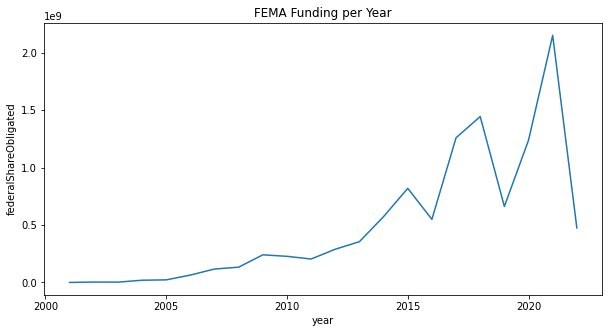

In [125]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="federalShareObligated", data=ObligationPerYear).set(title='FEMA Funding per Year')
plt.show()

#Which states are using FEMA funds? 

In [126]:
RevisedRiskMngPop.state

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
17096    Wyoming
17097    Wyoming
17098    Wyoming
17099    Wyoming
17100    Wyoming
Name: state, Length: 17101, dtype: object

In [127]:
#all funding by state --over the last 20 years, which states have received the most funding? Need fips codes for states.
ObligationByState = pd.DataFrame(RevisedRiskMngPop.groupby('state').federalShareObligated.mean()).reset_index()
ObligationByState.rename(columns = {'state':'STATE'}, inplace = True)
ObligationByState

STATE  federalShareObligated
0                Alabama           1.469189e+05
1                 Alaska           2.198303e+05
2                Arizona           1.043867e+05
3               Arkansas           3.914119e+05
4             California           7.678829e+05
5               Colorado           5.415524e+05
6            Connecticut           2.596201e+05
7               Delaware           4.402802e+04
8   District of Columbia           3.199549e+05
9                Florida           6.619771e+05
10               Georgia           1.937639e+05
11                Hawaii           2.691193e+05
12                 Idaho           1.232411e+05
13              Illinois           6.115840e+05
14               Indiana           3.421872e+05
15                  Iowa           6.706656e+05
16                Kansas           3.207068e+05
17              Kentucky           2.385824e+05
18             Louisiana           2.720667e+06
19                 Maine           8.086295e+04
20              Maryland           2.289236e+05
21         Massachusetts           3.127785e+05
22              Michigan           2.860549e+05
23             Minnesota           2.153344e+05
24           Mississippi           5.406936e+05
25              Missouri           7.341758e+05
26               Montana           1.577015e+05
27              Nebraska           2.194678e+05
28                Nevada           2.062184e+05
29         New Hampshire           1.009799e+05
30            New Jersey           6.596673e+05
31            New Mexico           2.413160e+05
32              New York           4.189145e+06
33        North Carolina           5.776289e+05
34          North Dakota           4.244707e+05
35                  Ohio           2.932275e+05
36              Oklahoma           1.652853e+05
37                Oregon           2.282706e+05
38          Pennsylvania           3.418845e+05
39          Rhode Island           1.237557e+05
40        South Carolina           4.639167e+05
41          South Dakota           1.268408e+05
42             Tennessee           4.678186e+05
43                 Texas           1.285947e+06
44                  Utah           2.231487e+05
45               Vermont           1.530603e+05
46              Virginia           2.706958e+05
47            Washington           3.059845e+05
48         West Virginia           3.044599e+05
49             Wisconsin           2.614941e+05
50               Wyoming           1.256017e+05

In [128]:
#join STATEFIPS to Total Funding by State
ObligationsByState = pd.merge(ObligationByState, RiskByState[['STATE', 'STATEABBRV', 'STATEFIPS']], on="STATE", how="left")
ObligationsByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATE                  51 non-null     object 
 1   federalShareObligated  51 non-null     float64
 2   STATEABBRV             51 non-null     object 
 3   STATEFIPS              51 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [129]:

fig = px.choropleth(ObligationsByState,
                    locations='STATEABBRV',
                    color='federalShareObligated',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa', width=1000, height=500)

fig.update_layout(
    title_text = 'Average FEMA Funds by State, 2001-2021')

fig.show()
#https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd

In [130]:
ObligationsByState['FEMAObligationsAdjForPopn'] = ObligationsByState['federalShareObligated']/RevisedRiskMngPop['statePop']

In [131]:
#Adjust Average FEMA Funds for population (average over 20 years)

fig = px.choropleth(ObligationsByState,
                    locations='STATEABBRV',
                    color='FEMAObligationsAdjForPopn',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa', width=1000, height=500,
                    labels={"FEMAObligationsAdjForPopn": "FEMA Funds Per Person"})

fig.update_layout(
    title_text = 'Average FEMA Funds by State, 2001-2021 (population adjusted)')

fig.show()

In [132]:
ObligationsByState['EstLossPerPerson'] = EstimatedLossByState['EAL_SCORE']/RevisedRiskMngPop['statePop']


In [133]:
#expected annual loss per person
fig = px.choropleth(ObligationsByState,
                    locations='STATEABBRV',
                    color='EstLossPerPerson',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa', width=1000, height=500)

fig.update_layout(
    title_text = 'Expected Annual Loss per person by State')

fig.show()

In [134]:
#join ObligationByState with RevisedRiskMng['statePop'] to make new column adjusted for population
ObligationAdjForPopn = pd.merge(ObligationByState, RevisedRiskMng, how = 'left', left_on=['STATE'], right_on=['state'])
ObligationAdjForPopn.columns

Index(['STATE', 'federalShareObligated_x', 'region', 'stateNumberCode',
       'state', 'countyCode', 'county', 'programArea', 'projectIdentifier',
       'projectType', 'projectTitle', 'projectCounties', 'numberOfProperties',
       'numberOfFinalProperties', 'status', 'subgrantee',
       'costSharePercentage', 'projectAmount', 'federalShareObligated_y',
       'programFy', 'dateInitiallyApproved', 'dateApproved', 'dateClosed',
       'granteeTribalIndicator', 'grantee', 'disasterNumber',
       'benefitCostRatio', 'netValueBenefits', 'subgranteeTribalIndicator',
       'id'],
      dtype='object')

#Do amounts applied toward mitigation correlate with the composite national risk index? The composite risk score is not aggregated by state, but we can look at Expected Annual Loss.

In [135]:
RevisedRiskMngPop.columns

Index(['stateNumberCode', 'countyCode', 'region', 'state', 'county',
       'programArea', 'projectIdentifier', 'projectType', 'projectTitle',
       'projectCounties', 'numberOfProperties', 'numberOfFinalProperties',
       'status', 'subgrantee', 'costSharePercentage', 'projectAmount',
       'federalShareObligated', 'programFy', 'dateInitiallyApproved',
       'dateApproved', 'dateClosed', 'granteeTribalIndicator', 'grantee',
       'disasterNumber', 'benefitCostRatio', 'netValueBenefits',
       'subgranteeTribalIndicator', 'id', 'countyPop', 'statePop', 'year'],
      dtype='object')

In [136]:
#new column divide Expected Annual Loss (RISK_SCORE is not available by state) by population adjusted funding (join federalShareObligated with RevisedRiskMngPop.statePop joined on state)
ObligationsByState['FundVsEstLossRtio'] = (ObligationsByState['federalShareObligated']/RevisedRiskMngPop['statePop'])/(EstimatedLossByState['EAL_SCORE']/RevisedRiskMngPop['statePop'])
ObligationsByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATE                      51 non-null     object 
 1   federalShareObligated      51 non-null     float64
 2   STATEABBRV                 51 non-null     object 
 3   STATEFIPS                  51 non-null     int64  
 4   FEMAObligationsAdjForPopn  51 non-null     float64
 5   EstLossPerPerson           51 non-null     float64
 6   FundVsEstLossRtio          51 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.2+ KB


In [137]:
ObligationsByState.head(20)

STATE  federalShareObligated STATEABBRV  STATEFIPS  \
0                Alabama           1.469189e+05         AL          1   
1                 Alaska           2.198303e+05         AK          2   
2                Arizona           1.043867e+05         AZ          4   
3               Arkansas           3.914119e+05         AR          5   
4             California           7.678829e+05         CA          6   
5               Colorado           5.415524e+05         CO          8   
6            Connecticut           2.596201e+05         CT          9   
7               Delaware           4.402802e+04         DE         10   
8   District of Columbia           3.199549e+05         DC         11   
9                Florida           6.619771e+05         FL         12   
10               Georgia           1.937639e+05         GA         13   
11                Hawaii           2.691193e+05         HI         15   
12                 Idaho           1.232411e+05         ID         16   
13              Illinois           6.115840e+05         IL         17   
14               Indiana           3.421872e+05         IN         18   
15                  Iowa           6.706656e+05         IA         19   
16                Kansas           3.207068e+05         KS         20   
17              Kentucky           2.385824e+05         KY         21   
18             Louisiana           2.720667e+06         LA         22   
19                 Maine           8.086295e+04         ME         23   

    FEMAObligationsAdjForPopn  EstLossPerPerson  FundVsEstLossRtio  
0                    0.030059      7.080844e-06        4245.117824  
1                    0.044834      3.272242e-06       13701.362784  
2                    0.021290      5.244527e-06        4059.387956  
3                    0.080081      6.927516e-06       11559.888292  
4                    0.157106      2.045960e-05        7678.828725  
5                    0.112121      6.765247e-06       16573.049536  
6                    0.058158      1.927498e-06       30172.899401  
7                    0.009844      1.022468e-06        9628.014915  
8                    0.065639      1.261000e-07      520528.787034  
9                    0.141525      1.224440e-05       11558.326900  
10                   0.041425      7.880002e-06        5256.977471  
11                   0.055462      3.688421e-06       15036.699430  
12                   0.025515      3.537227e-06        7213.371641  
13                   0.135540      9.410450e-06       14403.177848  
14                   0.073781      6.865493e-06       10746.578696  
15                   0.149956      8.232992e-06       18214.018437  
16                   0.069149      7.634901e-06        9056.972871  
17                   0.048945      6.699589e-06        7305.692249  
18                   0.577795      1.022239e-05       56522.465955  
19                   0.017173      1.700904e-06       10096.436019

In [138]:
fig = px.choropleth(ObligationsByState,
                    locations='STATEABBRV',
                    color='FundVsEstLossRtio',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa', width=1000, height=500)

fig.update_layout(
    title_text = 'Ratio of FEMA Obligated Funding to Expected Annual Loss (Population Adjusted)')

fig.show()

In [139]:
#compare risk scores by state and funding by state
#ratio population adjusted funding to population adjusted expected annual loss per person

#Which states have the greatest benefit/cost ratios?

In [140]:
RevisedRiskMngPop.columns
benefitCostAvgByState = pd.DataFrame(np.log2(RevisedRiskMngPop.groupby('state').benefitCostRatio.mean())).reset_index()

In [141]:
benefitCostAvgByState

state  benefitCostRatio
0                Alabama          1.590091
1                 Alaska          3.803997
2                Arizona          1.355401
3               Arkansas          0.928368
4             California          1.604174
5               Colorado          0.933289
6            Connecticut          2.064971
7               Delaware          1.277358
8   District of Columbia         -0.501494
9                Florida          1.859885
10               Georgia         -0.876044
11                Hawaii          1.877152
12                 Idaho          1.102454
13              Illinois         -0.116987
14               Indiana          0.495668
15                  Iowa          0.024515
16                Kansas          0.529244
17              Kentucky          1.785345
18             Louisiana          1.014411
19                 Maine          0.211947
20              Maryland          1.193967
21         Massachusetts          0.903863
22              Michigan          1.160327
23             Minnesota         -0.305891
24           Mississippi          1.703066
25              Missouri          0.803783
26               Montana          0.369944
27              Nebraska          0.494026
28                Nevada          1.027606
29         New Hampshire          0.313282
30            New Jersey          0.901921
31            New Mexico         -0.888592
32              New York          0.201014
33        North Carolina          0.265221
34          North Dakota          0.083697
35                  Ohio         -0.255290
36              Oklahoma          3.696222
37                Oregon          0.597768
38          Pennsylvania         -0.892043
39          Rhode Island         -0.655567
40        South Carolina          1.349107
41          South Dakota         -0.477525
42             Tennessee          1.100091
43                 Texas         12.420798
44                  Utah          4.471592
45               Vermont         -0.094409
46              Virginia          0.183876
47            Washington          0.912843
48         West Virginia          1.440269
49             Wisconsin         -0.545760
50               Wyoming          0.258253

In [142]:
benefitCostAvgByState.rename(columns = {'state':'STATE'}, inplace = True)
benefitCostAvgByState = pd.merge(benefitCostAvgByState, RiskByState[['STATE', 'STATEABBRV', 'STATEFIPS']], on="STATE", how="left")

In [193]:
fig = px.choropleth(benefitCostAvgByState,
                    locations='STATEABBRV',
                    color='benefitCostRatio',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa',
                    #labels = {'benefitCostRatio': 'ln(benefitCostRatio'},
                    title = 'Average Benefit to Cost Ratio By State, 2001-2021', width=1000, height=500)

# # fig.update_layout(
#     title_text = 'Average Benefit to Cost Ratio By State, 2001-2021')

fig.show()

#Which states had the most approved applications for FEMA funding?

In [144]:
ProjectCounts = pd.DataFrame(RevisedRiskMngPop.groupby('state').federalShareObligated.count()).reset_index()

In [145]:
ProjectCounts

state  federalShareObligated
0                Alabama                   1419
1                 Alaska                    134
2                Arizona                     66
3               Arkansas                    278
4             California                    668
5               Colorado                    120
6            Connecticut                    141
7               Delaware                     38
8   District of Columbia                     16
9                Florida                   1656
10               Georgia                    505
11                Hawaii                     65
12                 Idaho                     51
13              Illinois                    180
14               Indiana                    112
15                  Iowa                    618
16                Kansas                    364
17              Kentucky                    516
18             Louisiana                    806
19                 Maine                     84
20              Maryland                    174
21         Massachusetts                    201
22              Michigan                    197
23             Minnesota                    260
24           Mississippi                    687
25              Missouri                    367
26               Montana                    109
27              Nebraska                    325
28                Nevada                     36
29         New Hampshire                    160
30            New Jersey                    608
31            New Mexico                     78
32              New York                    421
33        North Carolina                    339
34          North Dakota                    248
35                  Ohio                    237
36              Oklahoma                   1047
37                Oregon                    193
38          Pennsylvania                    274
39          Rhode Island                     46
40        South Carolina                    259
41          South Dakota                    417
42             Tennessee                    233
43                 Texas                    910
44                  Utah                     40
45               Vermont                    247
46              Virginia                    262
47            Washington                    306
48         West Virginia                    288
49             Wisconsin                    261
50               Wyoming                     34

In [146]:
ProjectCounts.rename(columns = {'state':'STATE'}, inplace = True)
ProjectCountsByState = pd.merge(ProjectCounts, RiskByState[['STATE', 'STATEABBRV', 'STATEFIPS']], on="STATE", how="left")
ProjectCountsByState.rename(columns = {'federalShareObligated':'CountApprovedAplications'}, inplace = True)

In [147]:
fig = px.choropleth(ProjectCountsByState,
                    locations='STATEABBRV',
                    color='CountApprovedAplications',
                    color_continuous_scale='blues',
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa',
                    labels = {'benefitCostRatio': 'ln(benefitCostRatio'},
                    title = 'Total Project Applications Approved By State, 2001-2021')

fig.show()

#Compare federalShareObligation with GDP

In [148]:
state_project_gdp.head()

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
0       2001   197349.415152                   0.034874                1   
1       2001   197349.415152                   0.034874                4   
2       2001   197349.415152                   0.034874                5   
3       2001   197349.415152                   0.034874                8   
4       2001   197349.415152                   0.034874               11   

   stateCount                 state  statePop  costSharePercentage  \
0           3               Alabama   4451849             0.736667   
1           5               Arizona   5166697             0.716000   
2          64              Arkansas   2678288             0.750000   
3           5              Colorado   4328070             0.716000   
4           2  District of Columbia    571744             0.750000   

   projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
0       379244.0               281315.0          4066.0          0.494333   
1      1912879.0              1283103.0          6735.0          0.813000   
2     37771621.0             28286831.0         86674.0          1.333781   
3       634441.0               471956.0          6870.0          2.127600   
4       313549.0               241821.0          2778.0          0.500000   

   netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
0      88315.666667                    0.085188                  0.063191   
1     646452.500000                    0.370232                  0.248341   
2     917457.500000                   14.102897                 10.561534   
3     920469.600000                    0.146588                  0.109045   
4     162500.000000                    0.548408                  0.422953   

   federal_share_percentage GeoFIPS       GDP  GDP per capita  
0                  0.741778   01000  119851.7        0.026922  
1                  0.670771   04000  165110.7        0.031957  
2                  0.748891   05000   68678.5        0.025643  
3                  0.743893   08000  180063.2        0.041604  
4                  0.771238   11000   61092.9        0.106854

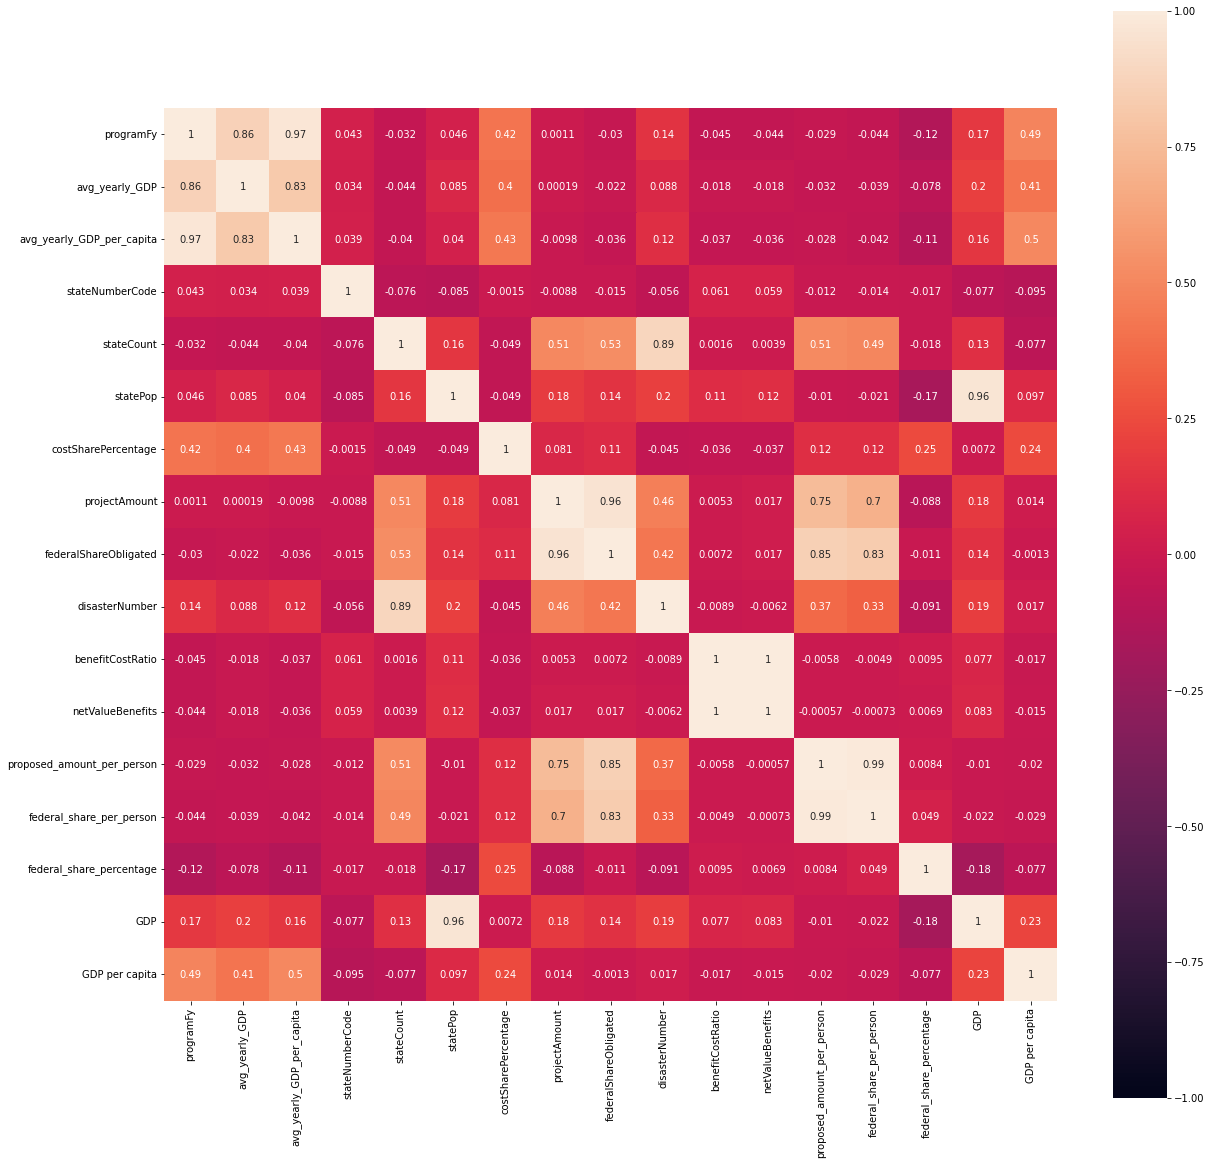

In [149]:
gdp_corr = state_project_gdp.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(gdp_corr, vmin=-1, vmax=1, square=True, annot=True)
ax.tick_params(axis='x', rotation=90)

In [150]:
state_project_gdp = state_project_gdp.astype({"GeoFIPS": str, "GDP":float})

In [151]:
agg_func={"stateCount":"sum", "statePop":"mean", "costSharePercentage": "mean", "projectAmount":"sum", "federalShareObligated":"sum", 'disasterNumber':'sum', 'benefitCostRatio':'mean', 'netValueBenefits':'sum', 'proposed_amount_per_person': 'mean', 'federal_share_per_person': 'mean', 'federal_share_percentage':'mean', 'GDP':'mean', 'GDP per capita':'mean'}
state_project_avg_gdp = state_project_gdp.groupby(["stateNumberCode", "state", "GeoFIPS"]).agg(agg_func).reset_index()
state_project_avg_gdp

stateNumberCode                 state GeoFIPS  stateCount      statePop  \
0                 1               Alabama   01000        1419  4.684071e+06   
1                 2                Alaska   02000         134  6.979447e+05   
2                 4               Arizona   04000          66  6.088689e+06   
3                 5              Arkansas   05000         278  2.873027e+06   
4                 6            California   06000         668  3.759234e+07   
5                 8              Colorado   08000         120  5.149946e+06   
6                 9           Connecticut   09000         141  3.558241e+06   
7                10              Delaware   10000          38  8.879635e+05   
8                11  District of Columbia   11000          16  6.262507e+05   
9                12               Florida   12000        1656  1.873995e+07   
10               13               Georgia   13000         505  9.804005e+06   
11               15                Hawaii   15000          65  1.319793e+06   
12               16                 Idaho   16000          51  1.586617e+06   
13               17              Illinois   17000         180  1.272063e+07   
14               18               Indiana   18000         112  6.349434e+06   
15               19                  Iowa   19000         618  3.047638e+06   
16               20                Kansas   20000         364  2.815756e+06   
17               21              Kentucky   21000         516  4.282227e+06   
18               22             Louisiana   22000         806  4.543327e+06   
19               23                 Maine   23000          84  1.314222e+06   
20               24              Maryland   24000         174  5.754462e+06   
21               25         Massachusetts   25000         201  6.602421e+06   
22               26              Michigan   26000         197  9.977706e+06   
23               27             Minnesota   27000         260  5.295060e+06   
24               28           Mississippi   28000         687  2.943111e+06   
25               29              Missouri   29000         367  5.937073e+06   
26               30               Montana   30000         109  1.001562e+06   
27               31              Nebraska   31000         325  1.812901e+06   
28               32                Nevada   32000          36  2.673112e+06   
29               33         New Hampshire   33000         160  1.322104e+06   
30               34            New Jersey   34000         608  8.748983e+06   
31               35            New Mexico   35000          78  2.049346e+06   
32               36              New York   36000         421  1.940764e+07   
33               37        North Carolina   37000         339  9.611352e+06   
34               38          North Dakota   38000         248  6.742067e+05   
35               39                  Ohio   39000         237  1.152680e+07   
36               40              Oklahoma   40000        1047  3.746248e+06   
37               41                Oregon   41000         193  3.852325e+06   
38               42          Pennsylvania   42000         274  1.259117e+07   
39               44          Rhode Island   44000          46  1.055584e+06   
40               45        South Carolina   45000         259  4.657604e+06   
41               46          South Dakota   46000         417  8.199939e+05   
42               47             Tennessee   47000         233  6.251554e+06   
43               48                 Texas   48000         910  2.513378e+07   
44               49                  Utah   49000          40  2.897626e+06   
45               50               Vermont   50000         247  6.213656e+05   
46               51              Virginia   51000         262  7.907944e+06   
47               53            Washington   53000         306  6.776732e+06   
48               54         West Virginia   54000         288  1.818397e+06   
49               55             Wisconsin   55000     

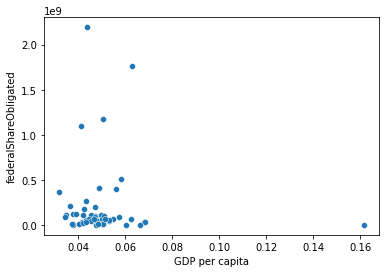

In [152]:
sns.scatterplot(data=state_project_avg_gdp, y="federalShareObligated", x="GDP per capita")

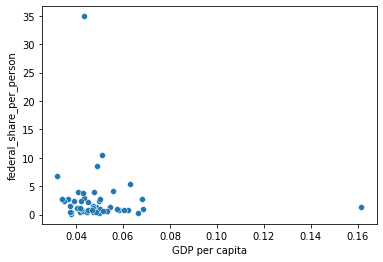

In [153]:
sns.scatterplot(data=state_project_avg_gdp, y="federal_share_per_person", x="GDP per capita")

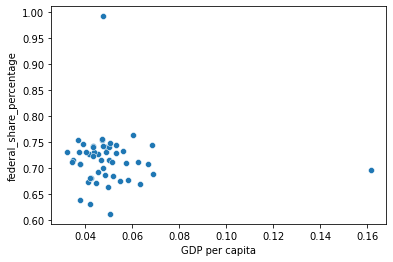

In [154]:
sns.scatterplot(data=state_project_avg_gdp, y="federal_share_percentage", x="GDP per capita")

#How is Composite Expected Annual Loss, Social Vulnerability, and Community Resiliance related to FEMA funding? Does it give any additional insight other than by the composite risk score (which is by county)? Is there state level data to compare 'risk' by state?

In [155]:
EstimatedLossByState[['STATE', 'EAL_VALT']].head() #Composite Expected Annual Loss by State, look at values SOVI_VALUE, RESL_VALUE or state percent values SOVI_SPCTL, RESL_SPCTL (percentage of the state by county in social vulnerability and resilience)

STATE      EAL_VALT
0     Alabama  5.469617e+08
1      Alaska  1.339037e+08
2     Arizona  3.022585e+08
3    Arkansas  5.225327e+08
4  California  6.820015e+09

In [156]:
state_sovi_resl = HazardsByCounty.groupby(["STATE", "STATEABBRV"]).agg({"SOVI_VALUE":"mean", "RESL_VALUE":"mean"}).reset_index() #aggregate social vulnerability and community resilience by state
state_sovi_resl.head()

STATE STATEABBRV  SOVI_VALUE  RESL_VALUE
0     Alabama         AL   -0.014627    2.651122
1      Alaska         AK    0.954138    2.358772
2     Arizona         AZ    3.151333    2.488309
3    Arkansas         AR    0.881467    2.626297
4  California         CA    0.044310    2.642307

In [157]:
#graph social vulnerability by state
fig = px.choropleth(state_sovi_resl, locations='STATEABBRV', color='SOVI_VALUE',
                    color_continuous_scale="Viridis",
                    range_color=(-3, 4),
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa',
                    labels={'SOVI_VALUE':'social vulnerability'},
                    title = 'Social Vulnerability Score By State', width=1000, height=500)
fig.show()

In [158]:
#graph community resilience by state
fig = px.choropleth(state_sovi_resl, locations='STATEABBRV', color='RESL_VALUE',
                    color_continuous_scale="Viridis",
                    range_color=(2, 3),
                    hover_name='STATE',
                    locationmode='USA-states',
                    scope='usa',
                    labels={'RESL_VALUE':'community resilience'},
                    title = 'Community Resilience Score By State', width=1000, height=500)
fig.show()

# If GDP matters for providing higher federal share percentage than proposed? Maybe t test

Text(0.5, 1.0, 'cost share percentage vs. federal share percentage at state level')

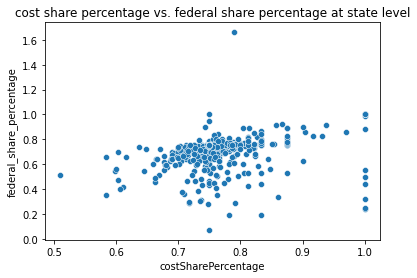

In [187]:
sns.scatterplot(x='costSharePercentage', y='federal_share_percentage', data=state_project_gdp)
plt.title("cost share percentage vs. federal share percentage at state level")

In [167]:
provide_more = state_project_gdp[state_project_gdp.federal_share_percentage - state_project_gdp.costSharePercentage >= 0]
provide_more.sort_values(by="GDP per capita")

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
16        2001   197349.415152                   0.034874               28   
30        2001   197349.415152                   0.034874               54   
17        2001   197349.415152                   0.034874               30   
75        2003   214279.780000                   0.037821               28   
59        2002   193830.564286                   0.033518               54   
..         ...             ...                        ...              ...   
591       2019   445300.367568                   0.058170                9   
633       2020   478127.957143                   0.064412               25   
4         2001   197349.415152                   0.034874               11   
66        2003   214279.780000                   0.037821               11   
369       2012   232122.189286                   0.053401               11   

     stateCount                 state  statePop  costSharePercentage  \
16           16           Mississippi   2848310                 0.75   
30           28         West Virginia   1806962                 0.75   
17           10               Montana    903293                 0.75   
75           20           Mississippi   2858643                 0.75   
59            8         West Virginia   1798582                 0.75   
..          ...                   ...       ...                  ...   
591           1           Connecticut   3571520                 0.75   
633           1         Massachusetts   6892503                 0.90   
4             2  District of Columbia    571744                 0.75   
66            2  District of Columbia    579585                 0.75   
369           4  District of Columbia    619800                 0.70   

     projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
16       4048156.0             3036119.00         21790.0          0.097688   
30      14242950.0            10682217.00         38584.0          2.056393   
17        692475.0              519357.00         13659.0          4.393400   
75       5344409.0             4008309.00         28937.0          0.792700   
59       4954193.0             3715646.00         11280.0          0.000000   
..             ...                    ...             ...               ...   
591       669100.0              501825.00          4410.0          0.000000   
633       571500.0              514350.00          4496.0          0.000000   
4         313549.0              241821.00          2778.0          0.500000   
66         89193.0               66895.00          2986.0          0.000000   
369      1343136.0              980144.93         16263.0          0.584250   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
16       9.087006e+04                    1.421248                  1.065937   
30       1.426650e+06                    7.882263                  5.911700   
17       3.703388e+05                    0.766612                  0.574960   
75       5.937055e+05                    1.869562                  1.402172   
59       0.000000e+00                    2.754499                  2.065875   
..                ...                         ...                       ...   
591      0.000000e+00                    0.187343                  0.140507   
633      0.000000e+00                    0.082916                  0.074625   
4        1.625000e+05                    0.548408                  0.422953   
66       0.000000e+00                    0.153891                  0.115419   
369      5.298880e+05                    2.167047                  1.581389   

     federal_share_percentage GeoFIPS       GDP  GDP per capita  
16                   0.750000   28000   65673.1        0.023057  
30                   0.750000   54000   42495.6        0.023518  
17                   0.750001   30000   21876.7        0.024219  
75                   0.750000   28000   6

In [168]:
provide_less = state_project_gdp[state_project_gdp.federal_share_percentage - state_project_gdp.costSharePercentage < 0]
provide_less.sort_values(by="GDP per capita")

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
47        2002   193830.564286                   0.033518               28   
90        2003   214279.780000                   0.037821               54   
2         2001   197349.415152                   0.034874                5   
105       2004   272007.350000                   0.036687               28   
22        2001   197349.415152                   0.034874               40   
..         ...             ...                        ...              ...   
607       2019   445300.367568                   0.058170               36   
641       2020   478127.957143                   0.064412               36   
327       2011   293183.506667                   0.050834               11   
496       2016   319367.507692                   0.057248               11   
628       2020   478127.957143                   0.064412               11   

     stateCount                 state  statePop  costSharePercentage  \
47            5           Mississippi   2853313             0.750000   
90            7         West Virginia   1799411             0.750000   
2            64              Arkansas   2678288             0.750000   
105          14           Mississippi   2867678             0.750000   
22          155              Oklahoma   3453943             0.702903   
..          ...                   ...       ...                  ...   
607           6              New York  19530351             0.750000   
641           5              New York  19453561             0.748000   
327           3  District of Columbia    605226             0.810000   
496           4  District of Columbia    675400             0.762500   
628           1  District of Columbia    705749             1.000000   

     projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
47      1023406.00              767554.00          6990.0          1.281600   
90      2098294.00             1573719.00         10280.0          0.315857   
2      37771621.00            28286831.00         86674.0          1.333781   
105     1992844.00             1494619.00         21700.0          2.062214   
22     36750156.00            24944638.00        210477.0          0.557684   
..             ...                    ...             ...               ...   
607     3544870.42             2657653.25         26382.0          3.484333   
641      461725.00              345000.00         22360.0          0.000000   
327      132072.00               98442.04         12108.0          1.721667   
496     4077345.11             2766438.92         17040.0          0.700000   
628     1931074.04              965537.02          4502.0          0.000000   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
47       5.298786e+05                    0.358673                  0.269004   
90       7.620014e+04                    1.166100                  0.874575   
2        9.174575e+05                   14.102897                 10.561534   
105      4.628001e+05                    0.694933                  0.521195   
22       1.908656e+05                   10.640059                  7.222076   
..                ...                         ...                       ...   
607      9.211320e+05                    0.181506                  0.136078   
641      0.000000e+00                    0.023735                  0.017735   
327      1.035382e+06                    0.218219                  0.162653   
496      1.188178e+06                    6.036934                  4.096001   
628      0.000000e+00                    2.736205                  1.368103   

     federal_share_percentage GeoFIPS        GDP  GDP per capita  
47                   0.750000   28000    67174.0        0.023542  
90                   0.749999   54000    45580.8        0.025331  
2                    0.748891   05000    68678.5        0.025643  
105                  0.749993   28000

In [188]:
d = {'class': ['provide euqal or more', 'provide less'], 'count': [provide_more.shape[0], provide_less.shape[0]]}
df = pd.DataFrame(data=d)
df

class  count
0  provide euqal or more    198
1           provide less    469

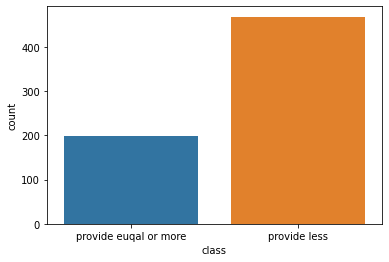

In [189]:
sns.barplot(x='class', y='count', data=df)

In [180]:
provide_less_sample = provide_less.sample(n=198)
provide_more_sample = provide_more#.sample(n=150)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Ttest_indResult(statistic=1.6218646053387382, pvalue=0.10563224418029109)

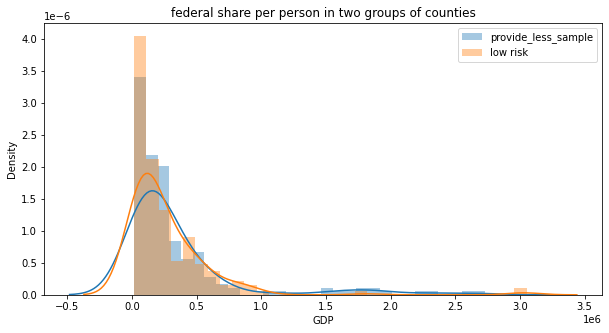

In [190]:
plt.figure(figsize=(10,5))
sns.distplot(provide_less_sample.GDP, label="provide_less_sample", hist=True, kde=True)
sns.distplot(provide_more_sample.GDP, label="low risk", hist=True, kde=True)
plt.title("federal share per person in two groups of counties")
plt.legend()

stats.ttest_ind(provide_less_sample.GDP, provide_more_sample.GDP)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Ttest_indResult(statistic=3.064307097331625, pvalue=0.0023318128455101263)

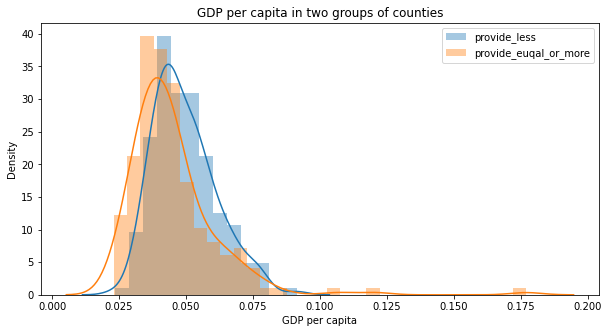

In [192]:
plt.figure(figsize=(10,5))
sns.distplot(provide_less_sample['GDP per capita'], label="provide_less", hist=True, kde=True)
sns.distplot(provide_more_sample['GDP per capita'], label="provide_euqal_or_more", hist=True, kde=True)
plt.title("GDP per capita in two groups of counties")
plt.legend()

stats.ttest_ind(provide_less_sample['GDP per capita'], provide_more_sample['GDP per capita'])

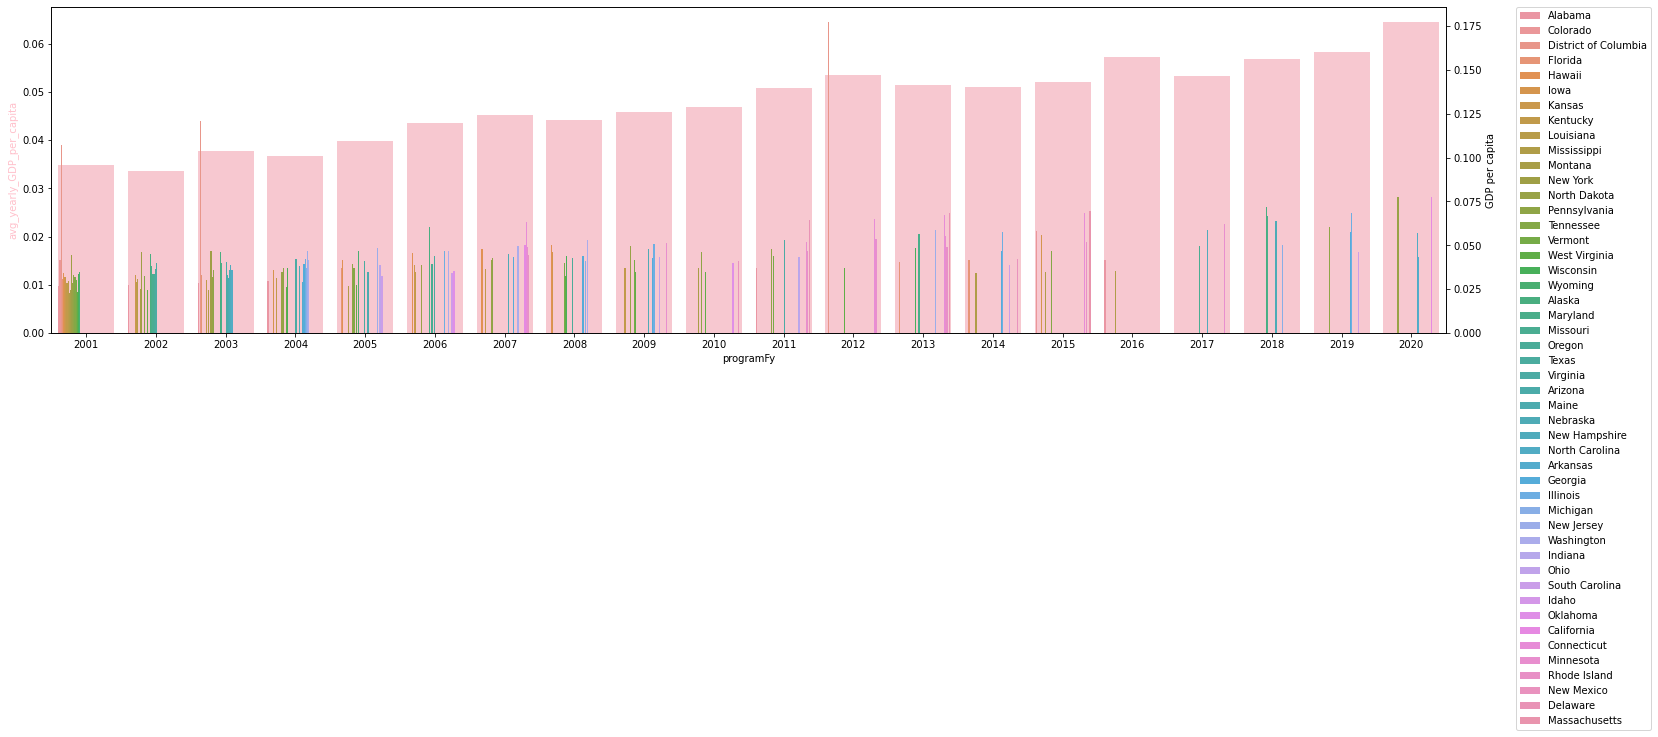

In [161]:


fig, ax1 = plt.subplots(figsize=(25,6))
ax1.set_ylabel('average yearly GDP per capita', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP_per_capita", data=provide_more, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP per capita",hue="state", data=provide_more)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

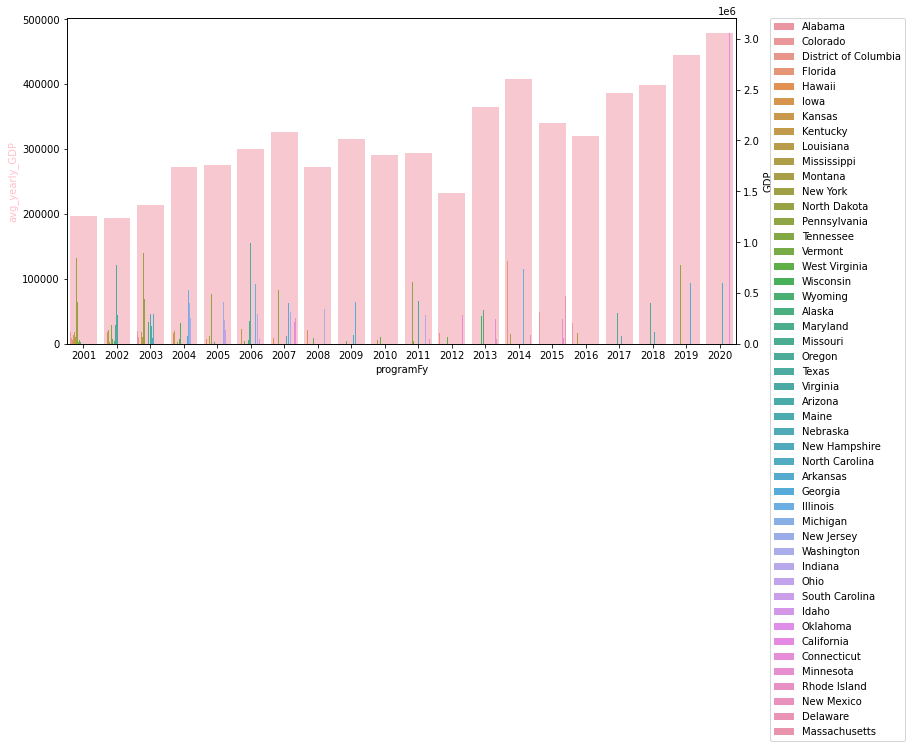

In [162]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_ylabel('average yearly GDP', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP", data=provide_more, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP",hue="state", data=provide_more)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

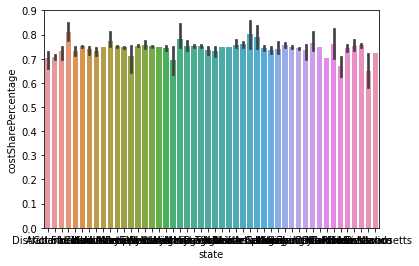

In [163]:
sns.barplot(x="state", y="costSharePercentage", data=provide_more)

In [164]:
provide_less = state_project_gdp[state_project_gdp.federal_share_percentage - state_project_gdp.costSharePercentage < 0]
provide_less.sort_values(by="GDP per capita")

programFy  avg_yearly_GDP  avg_yearly_GDP_per_capita  stateNumberCode  \
47        2002   193830.564286                   0.033518               28   
90        2003   214279.780000                   0.037821               54   
2         2001   197349.415152                   0.034874                5   
105       2004   272007.350000                   0.036687               28   
22        2001   197349.415152                   0.034874               40   
..         ...             ...                        ...              ...   
607       2019   445300.367568                   0.058170               36   
641       2020   478127.957143                   0.064412               36   
327       2011   293183.506667                   0.050834               11   
496       2016   319367.507692                   0.057248               11   
628       2020   478127.957143                   0.064412               11   

     stateCount                 state  statePop  costSharePercentage  \
47            5           Mississippi   2853313             0.750000   
90            7         West Virginia   1799411             0.750000   
2            64              Arkansas   2678288             0.750000   
105          14           Mississippi   2867678             0.750000   
22          155              Oklahoma   3453943             0.702903   
..          ...                   ...       ...                  ...   
607           6              New York  19530351             0.750000   
641           5              New York  19453561             0.748000   
327           3  District of Columbia    605226             0.810000   
496           4  District of Columbia    675400             0.762500   
628           1  District of Columbia    705749             1.000000   

     projectAmount  federalShareObligated  disasterNumber  benefitCostRatio  \
47      1023406.00              767554.00          6990.0          1.281600   
90      2098294.00             1573719.00         10280.0          0.315857   
2      37771621.00            28286831.00         86674.0          1.333781   
105     1992844.00             1494619.00         21700.0          2.062214   
22     36750156.00            24944638.00        210477.0          0.557684   
..             ...                    ...             ...               ...   
607     3544870.42             2657653.25         26382.0          3.484333   
641      461725.00              345000.00         22360.0          0.000000   
327      132072.00               98442.04         12108.0          1.721667   
496     4077345.11             2766438.92         17040.0          0.700000   
628     1931074.04              965537.02          4502.0          0.000000   

     netValueBenefits  proposed_amount_per_person  federal_share_per_person  \
47       5.298786e+05                    0.358673                  0.269004   
90       7.620014e+04                    1.166100                  0.874575   
2        9.174575e+05                   14.102897                 10.561534   
105      4.628001e+05                    0.694933                  0.521195   
22       1.908656e+05                   10.640059                  7.222076   
..                ...                         ...                       ...   
607      9.211320e+05                    0.181506                  0.136078   
641      0.000000e+00                    0.023735                  0.017735   
327      1.035382e+06                    0.218219                  0.162653   
496      1.188178e+06                    6.036934                  4.096001   
628      0.000000e+00                    2.736205                  1.368103   

     federal_share_percentage GeoFIPS        GDP  GDP per capita  
47                   0.750000   28000    67174.0        0.023542  
90                   0.749999   54000    45580.8        0.025331  
2                    0.748891   05000    68678.5        0.025643  
105                  0.749993   28000

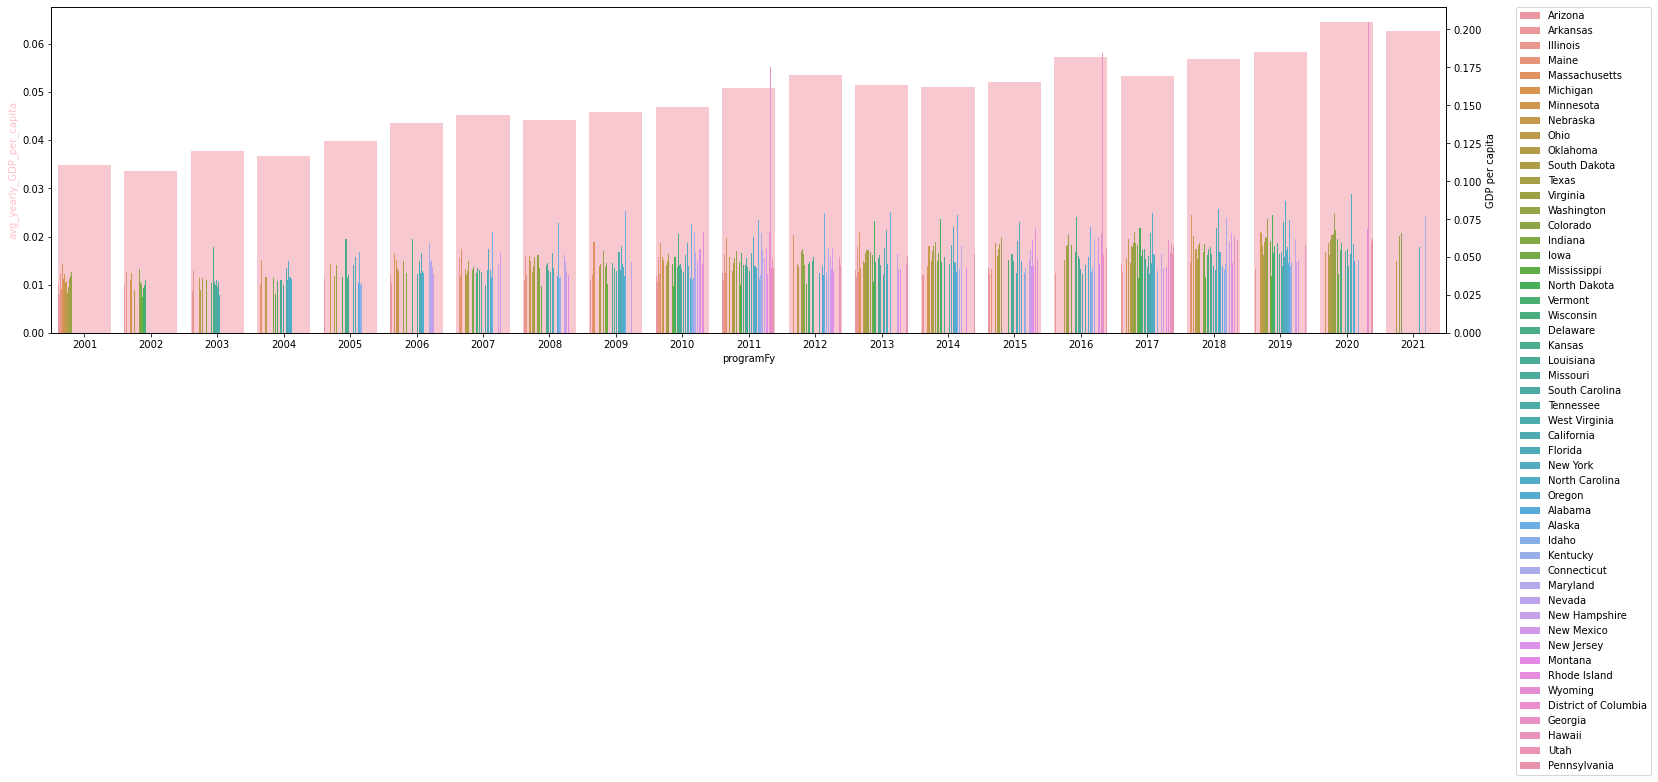

In [165]:
fig, ax1 = plt.subplots(figsize=(25,6))
ax1.set_ylabel('average yearly GDP per capita', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP_per_capita", data=provide_less, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP per capita",hue="state", data=provide_less)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

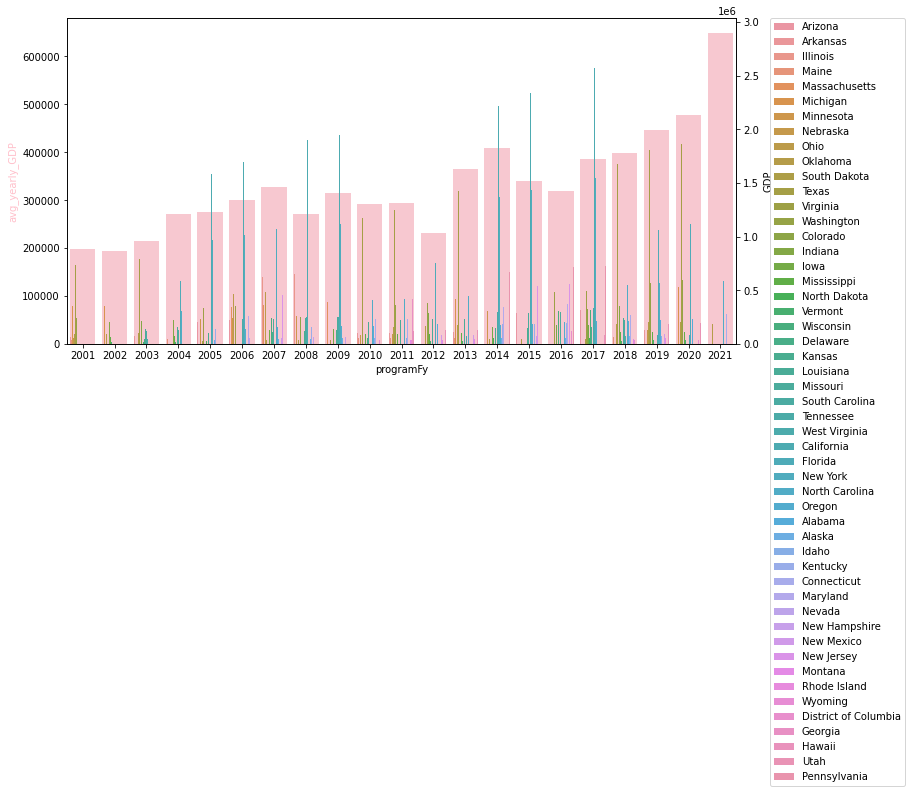

In [166]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_ylabel('average yearly GDP', fontsize=10, color="pink")
ax1 = sns.barplot(x="programFy", y="avg_yearly_GDP", data=provide_less, color="pink")
ax2 = ax1.twinx()
ax2 = sns.barplot(x="programFy", y="GDP",hue="state", data=provide_less)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)